In [7]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import seaborn as sns
import numpy as np


In [8]:
df = pd.read_parquet('dataforanalysing.parquet')

In [9]:
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
PULocationID                      int64
DOLocationID                      int64
pickup_date              datetime64[ns]
pickup_time                      object
dropoff_date                     object
dropoff_time                     object
pickup_month                     object
dropoff_month                  category
holiday                            bool
week                              int32
day_type                         object
dropoff_timeslots                object
pickup_timeslots                 object
season                           object
dtype: object

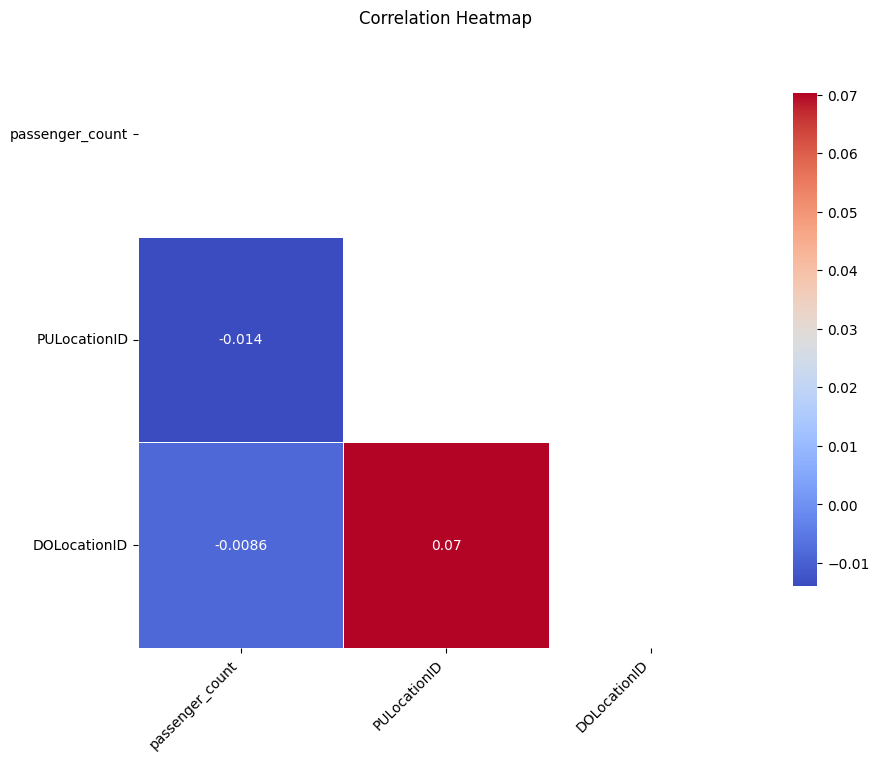

In [10]:
# Select the columns for correlation analysis
columns = ['passenger_count', 'PULocationID', 'DOLocationID']

# Create a subset of the DataFrame with the selected columns
subset_df = df[columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a mask to display only the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={'shrink': 0.8}, ax=ax)

# Set the tick labels and rotation for x and y axes
ax.set_xticklabels(columns, rotation=45, ha='right')
ax.set_yticklabels(columns, rotation=0)

# Add a title to the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

/var/folders/6q/9wmlbvpj5nqfn_clctmzyck00000gn/T/ipykernel_10050/2163401018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_data['pickup_time'] = pd.to_datetime(winter_data['pickup_time'], format='%H:%M:%S').dt.hour
/var/folders/6q/9wmlbvpj5nqfn_clctmzyck00000gn/T/ipykernel_10050/2163401018.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring_data['pickup_time'] = pd.to_datetime(spring_data['pickup_time'], format='%H:%M:%S').dt.hour
/var/folders/6q/9wmlbvpj5nqfn_clctmzyck00000gn/T/ipykernel

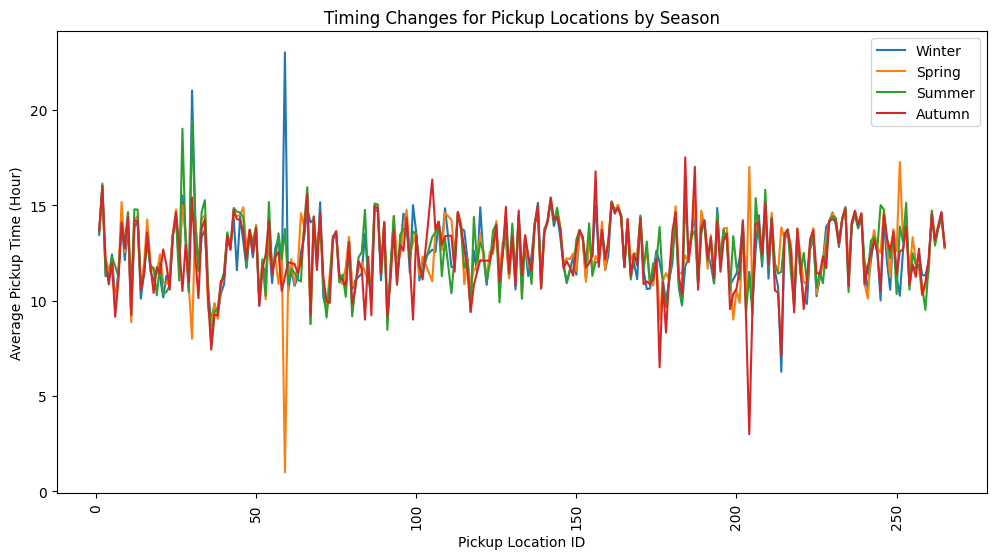

In [11]:
# Filter the DataFrame for each season
winter_data = df[df['season'] == 'winter']
spring_data = df[df['season'] == 'spring']
summer_data = df[df['season'] == 'summer']
autumn_data = df[df['season'] == 'autumn']

# Convert the pickup_time column to a string and then to a numerical representation
winter_data['pickup_time'] = pd.to_datetime(winter_data['pickup_time'], format='%H:%M:%S').dt.hour
spring_data['pickup_time'] = pd.to_datetime(spring_data['pickup_time'], format='%H:%M:%S').dt.hour
summer_data['pickup_time'] = pd.to_datetime(summer_data['pickup_time'], format='%H:%M:%S').dt.hour
autumn_data['pickup_time'] = pd.to_datetime(autumn_data['pickup_time'], format='%H:%M:%S').dt.hour

# Group the data by PULocationID and calculate the average pickup time for each location and season
winter_avg_pickup_time = winter_data.groupby('PULocationID')['pickup_time'].mean()
spring_avg_pickup_time = spring_data.groupby('PULocationID')['pickup_time'].mean()
summer_avg_pickup_time = summer_data.groupby('PULocationID')['pickup_time'].mean()
autumn_avg_pickup_time = autumn_data.groupby('PULocationID')['pickup_time'].mean()

# Plot the timing changes for pickup locations by season
plt.figure(figsize=(12, 6))
plt.plot(winter_avg_pickup_time.index, winter_avg_pickup_time, label='Winter')
plt.plot(spring_avg_pickup_time.index, spring_avg_pickup_time, label='Spring')
plt.plot(summer_avg_pickup_time.index, summer_avg_pickup_time, label='Summer')
plt.plot(autumn_avg_pickup_time.index, autumn_avg_pickup_time, label='Autumn')

plt.xlabel('Pickup Location ID')
plt.ylabel('Average Pickup Time (Hour)')
plt.title('Timing Changes for Pickup Locations by Season')
plt.legend()
plt.xticks(rotation=90)
plt.savefig('timing_changes_by_season.png')
plt.show()


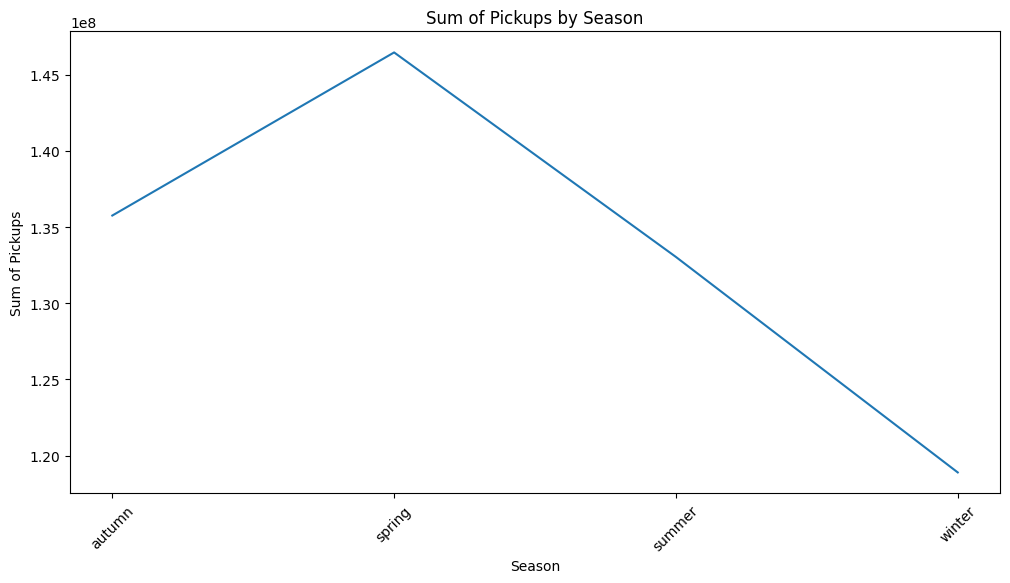

In [13]:
# Convert the pickup_time column to a string and then to a numerical representation
df['pickup_time'] = pd.to_datetime(df['pickup_time'], format='%H:%M:%S').dt.hour

# Group the data by season and calculate the sum of pickups for each season
pickup_sum_by_season = df.groupby('season')['pickup_time'].sum()

# Plot the sum of pickups by season as a line plot
plt.figure(figsize=(12, 6))
plt.plot(pickup_sum_by_season.index, pickup_sum_by_season)
plt.xlabel('Season')
plt.ylabel('Sum of Pickups')
plt.title('Sum of Pickups by Season')
plt.xticks(rotation=45)
plt.show()



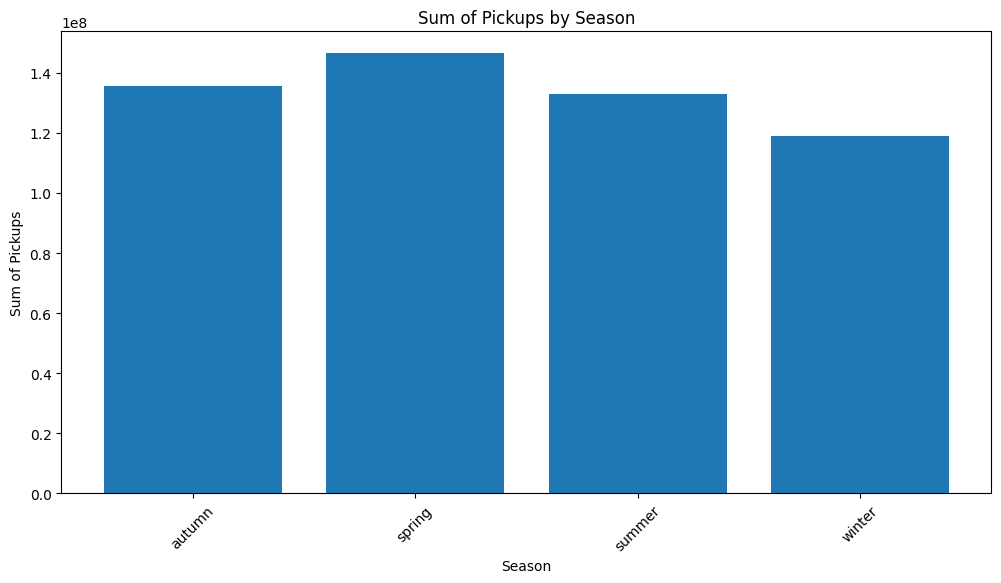

In [14]:

# Create a bar chart of the sum of pickups by season
plt.figure(figsize=(12, 6))
plt.bar(pickup_sum_by_season.index, pickup_sum_by_season)
plt.xlabel('Season')
plt.ylabel('Sum of Pickups')
plt.title('Sum of Pickups by Season')
plt.xticks(rotation=45)
plt.show()

In [15]:
pulocations_to_filter = [4, 12, 13, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90, 100, 103, 104, 105, 107, 113, 114, 116, 120, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148, 151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 194, 202, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]

grouped_df = df.groupby(['PULocationID', 'tpep_pickup_datetime']).size().reset_index(name='count')

# Filter the DataFrame based on PULocationID
df_filtered = grouped_df[grouped_df['PULocationID'].isin(pulocations_to_filter)]

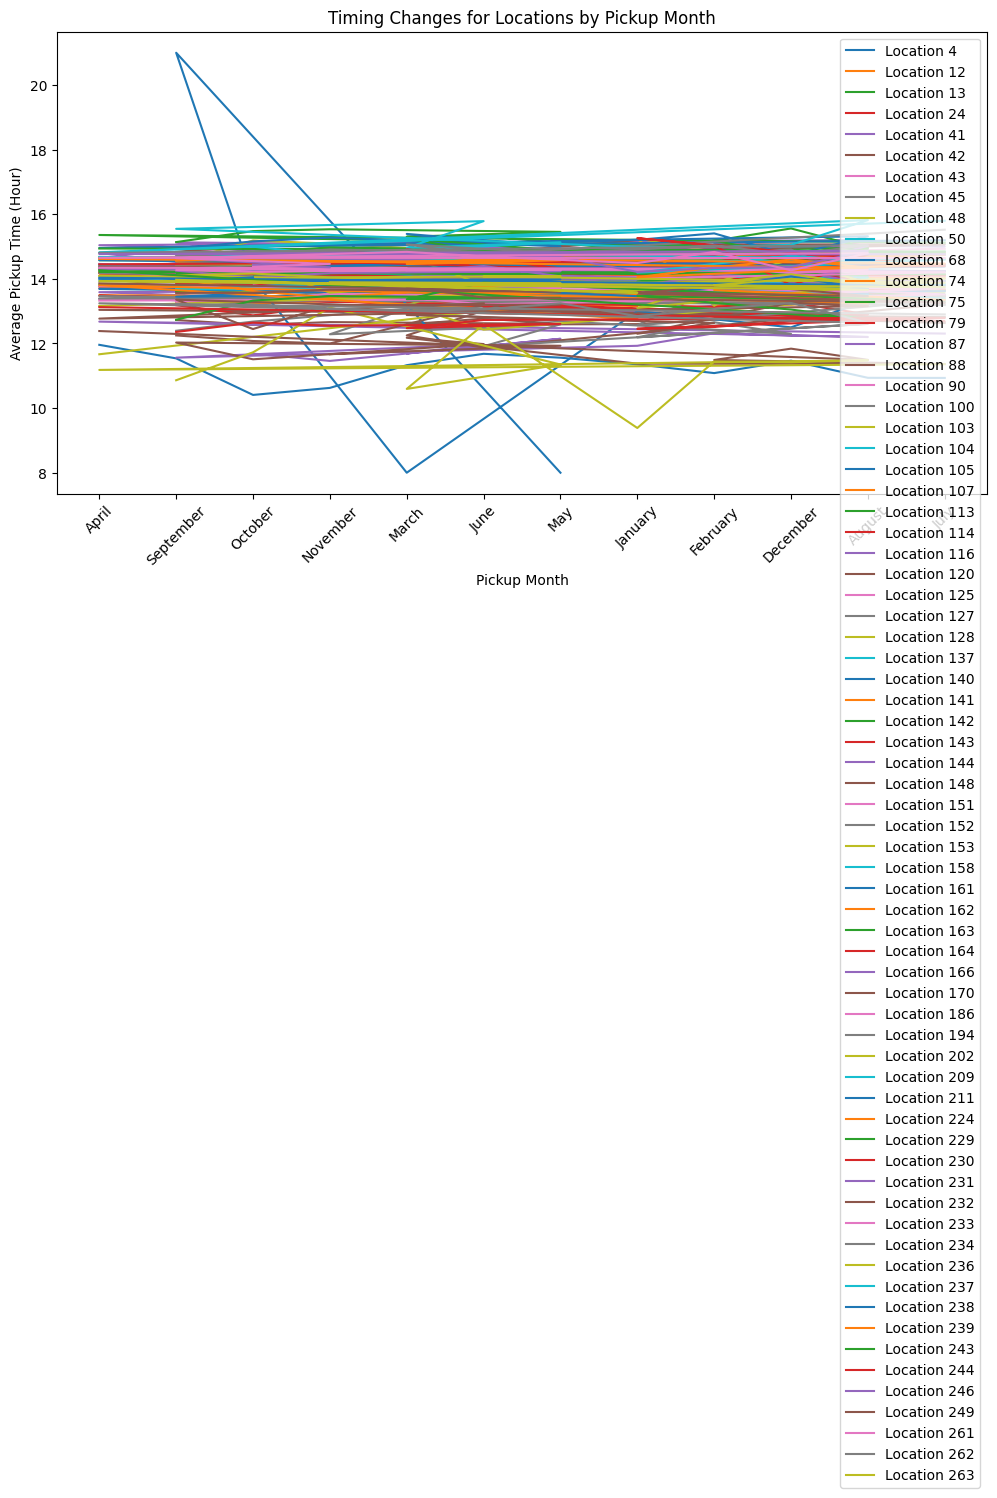

In [16]:

# Filter the DataFrame for the specified locations
filtered_data = df[df['PULocationID'].isin(pulocations_to_filter)]

# Group the data by PULocationID and pickup_month and calculate the average pickup time
avg_pickup_time_by_month = filtered_data.groupby(['PULocationID', 'pickup_month'])['pickup_time'].mean()

# Reset the index to convert the grouped data into a DataFrame
avg_pickup_time_by_month = avg_pickup_time_by_month.reset_index()

# Sort the DataFrame by PULocationID for better visualization
avg_pickup_time_by_month = avg_pickup_time_by_month.sort_values(by='PULocationID')

# Create a line plot for each location
plt.figure(figsize=(12, 6))
for location in pulocations_to_filter:
    location_data = avg_pickup_time_by_month[avg_pickup_time_by_month['PULocationID'] == location]
    plt.plot(location_data['pickup_month'], location_data['pickup_time'], label=f'Location {location}')

plt.xlabel('Pickup Month')
plt.ylabel('Average Pickup Time (Hour)')
plt.title('Timing Changes for Locations by Pickup Month')
plt.legend()
plt.xticks(rotation=45)
plt.show()


This below will work when i have filtered it for manhattan 

In [18]:

# # Group the data by PULocationID and pickup_month and calculate the average pickup time
# avg_pickup_time_by_month = df.groupby(['PULocationID', 'pickup_month'])['pickup_time'].mean()

# # Reset the index to convert the grouped data into a DataFrame
# avg_pickup_time_by_month = avg_pickup_time_by_month.reset_index()

# # Sort the DataFrame by PULocationID for better visualization
# avg_pickup_time_by_month = avg_pickup_time_by_month.sort_values(by='PULocationID')

# # Create a line plot for each location
# plt.figure(figsize=(12, 6))
# for location in avg_pickup_time_by_month['PULocationID'].unique():
#     location_data = avg_pickup_time_by_month[avg_pickup_time_by_month['PULocationID'] == location]
#     plt.plot(location_data['pickup_month'], location_data['pickup_time'], label=f'Location {location}')

# plt.xlabel('Pickup Month')
# plt.ylabel('Average Pickup Time (Hour)')
# plt.title('Timing Changes for Locations by Pickup Month')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()


In [27]:
df = pd.read_parquet('dataforanalysing.parquet')

In [28]:
# Convert the pickup_time column to a string and then to a numerical representation
pickup_hour = df['tpep_pickup_datetime'].dt.hour

# Filter the data for the specified locations
filtered_data = df[df['PULocationID'].isin(pulocations_to_filter)]

# Group the filtered data by PULocationID and pickup_month and calculate the average pickup time
avg_pickup_time_by_month = filtered_data.groupby(['PULocationID', 'pickup_month'])[pickup_hour].mean()

# Reset the index to convert the grouped data into a DataFrame
avg_pickup_time_by_month = avg_pickup_time_by_month.reset_index()

# Sort the DataFrame by PULocationID for better visualization
avg_pickup_time_by_month = avg_pickup_time_by_month.sort_values(by='PULocationID')

# Create a line plot for each location
plt.figure(figsize=(12, 6))
for location in pulocations_to_filter:
    location_data = avg_pickup_time_by_month[avg_pickup_time_by_month['PULocationID'] == location]
    plt.plot(location_data['pickup_month'], location_data[pickup_hour], label=f'Location {location}')

plt.xlabel('Pickup Month')
plt.ylabel('Average Pickup Time (Hour)')
plt.title('Timing Changes for Locations by Pickup Month')
plt.legend()
plt.xticks(rotation=45)
plt.show()


KeyError: 'Columns not found: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23'

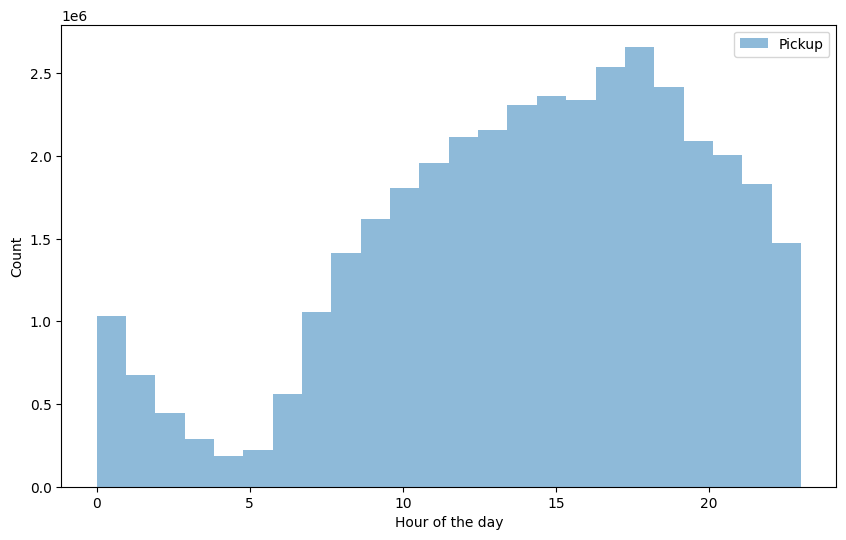

In [29]:
pickup_hour = df['tpep_pickup_datetime'].dt.hour

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.hist(pickup_hour, bins=24, alpha=0.5, label='Pickup')
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

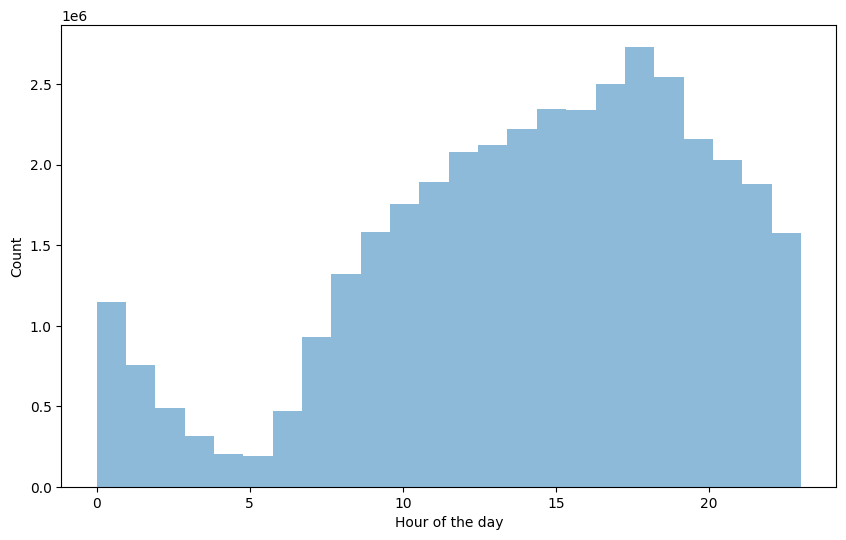

In [30]:
# Plot the distributions
dropoff_hour = df['tpep_dropoff_datetime'].dt.hour
plt.figure(figsize=(10, 6))
plt.hist(dropoff_hour, bins=24, alpha=0.5, label='Dropoff')
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.show()

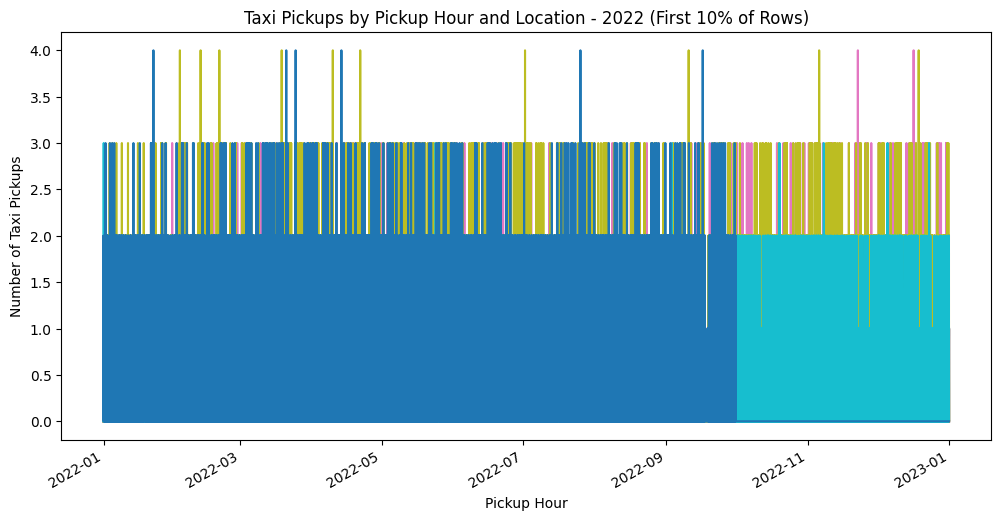

In [31]:
## ONLY 10 PER CENT 

pulocations_to_filter = [4, 12, 13, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90, 100, 103, 104, 105, 107, 113, 114, 116, 120, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148, 151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 194, 202, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]

grouped_df = df.groupby(['PULocationID', 'tpep_pickup_datetime']).size().reset_index(name='count')

# Filter the DataFrame based on PULocationID
df_filtered = grouped_df[grouped_df['PULocationID'].isin(pulocations_to_filter)]

# Filter the DataFrame for a specific year
year = 2022
df_year = df_filtered[df_filtered['tpep_pickup_datetime'].dt.year == year]

# Select the first 10% of rows
percentage = 0.1
df_sample = df_year.head(int(len(df_year) * percentage))

# Visualize the hotspots on a graph for the specific year
pivot_df = df_sample.pivot(index='tpep_pickup_datetime', columns='PULocationID', values='count').fillna(0)
pivot_df.plot(figsize=(12, 6), legend=None)
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Taxi Pickups')
plt.title(f'Taxi Pickups by Pickup Hour and Location - {year} (First 10% of Rows)')
plt.show()

In [32]:
# Filter the DataFrame for a specific year
year = 2022
df_year = df_filtered[df_filtered['tpep_pickup_datetime'].dt.year == year]

In [33]:
print("Original DataFrame Size:")
print(df_filtered.shape)


Original DataFrame Size:
(32900795, 3)


In [34]:
# Pivot the dataframe such that 'pickup_hour' and 'dropoff_hour' become columns, and count the number of occurrences of each
pickup_by_location = df.pivot_table(index='PULocationID', columns='pickup_time', aggfunc='size', fill_value=0)
dropoff_by_location = df.pivot_table(index='DOLocationID', columns='dropoff_time', aggfunc='size', fill_value=0)
sample_locations = [107, 238]  # replace with your actual location ids


In [35]:
# Convert time objects to numeric hour values
pickup_hours = [time.hour for time in pickup_by_location.columns]
dropoff_hours = [time.hour for time in dropoff_by_location.columns]


In [36]:
pulocations_to_filter = [4, 12, 13, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90, 100, 105, 107, 113, 114, 116, 120, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148, 151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 194, 202, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]

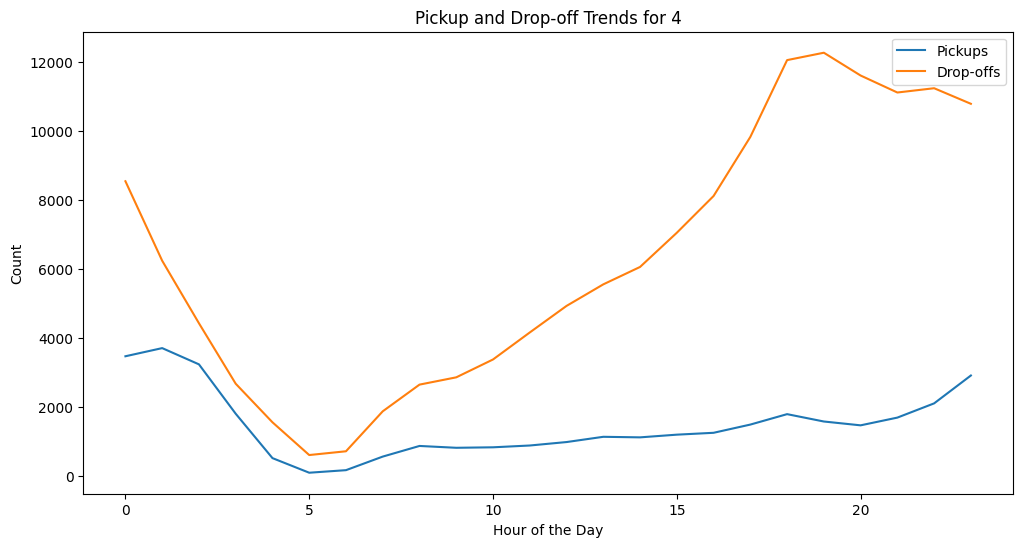

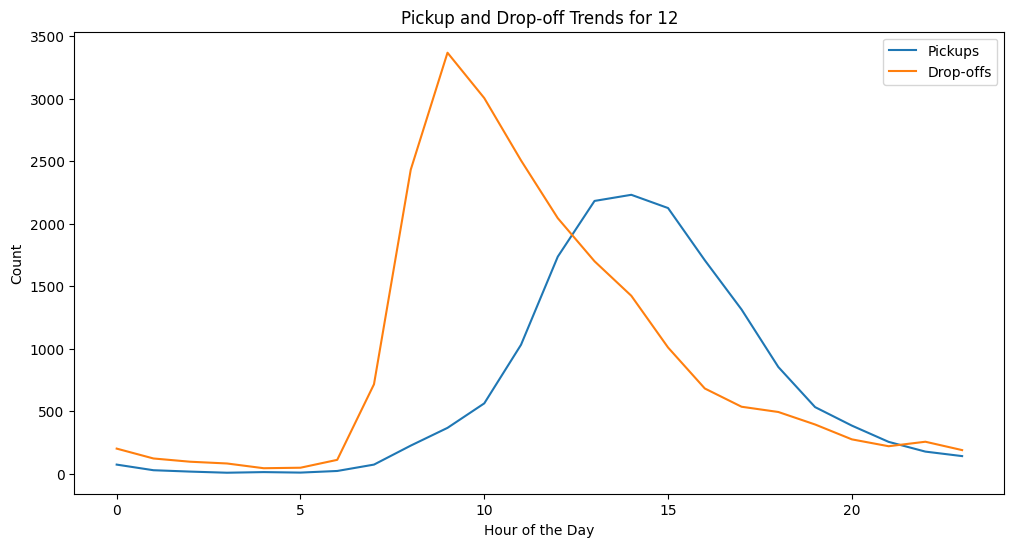

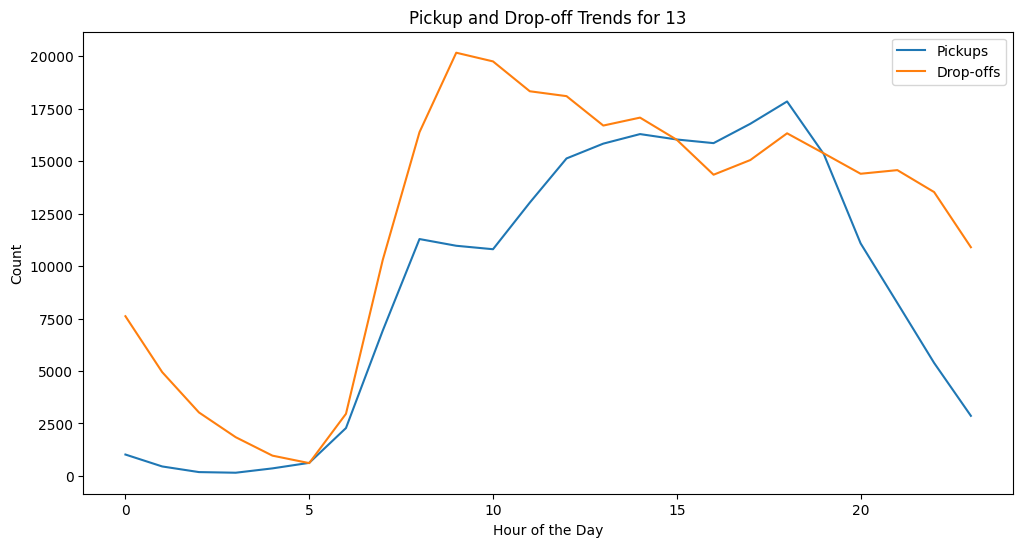

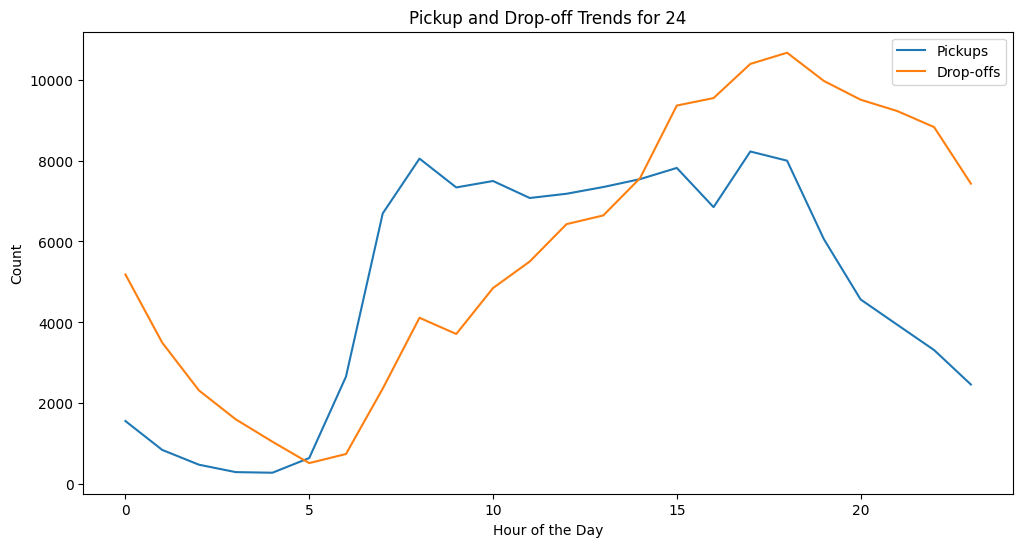

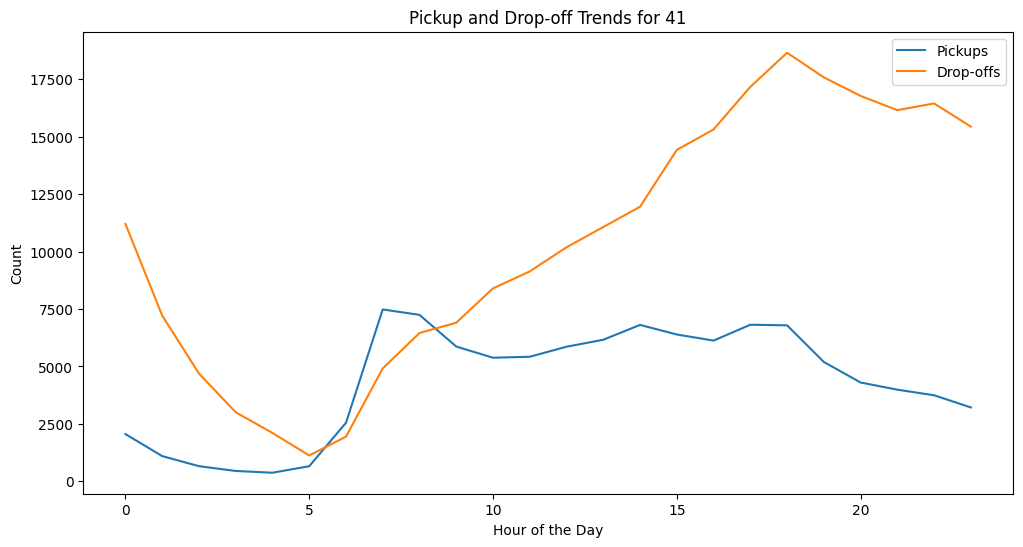

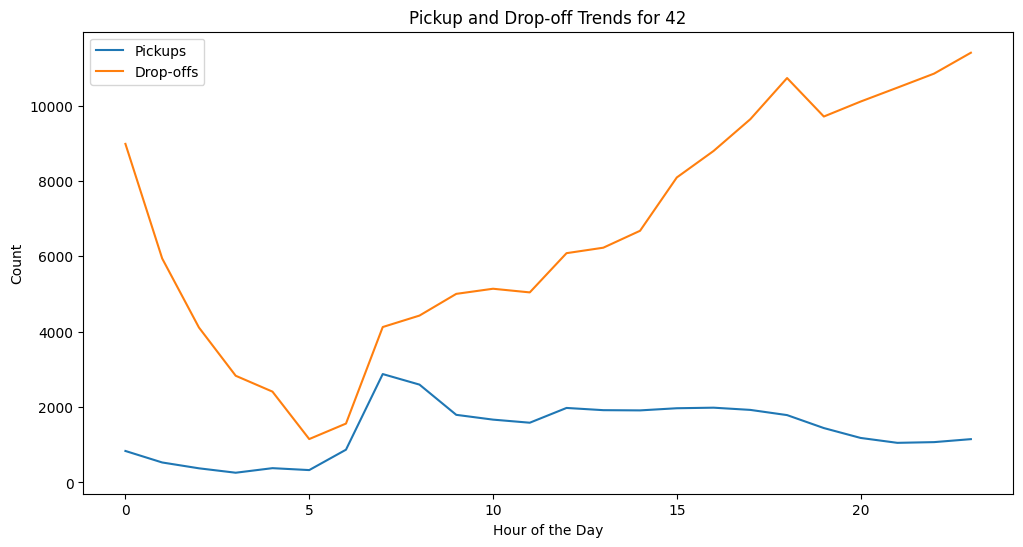

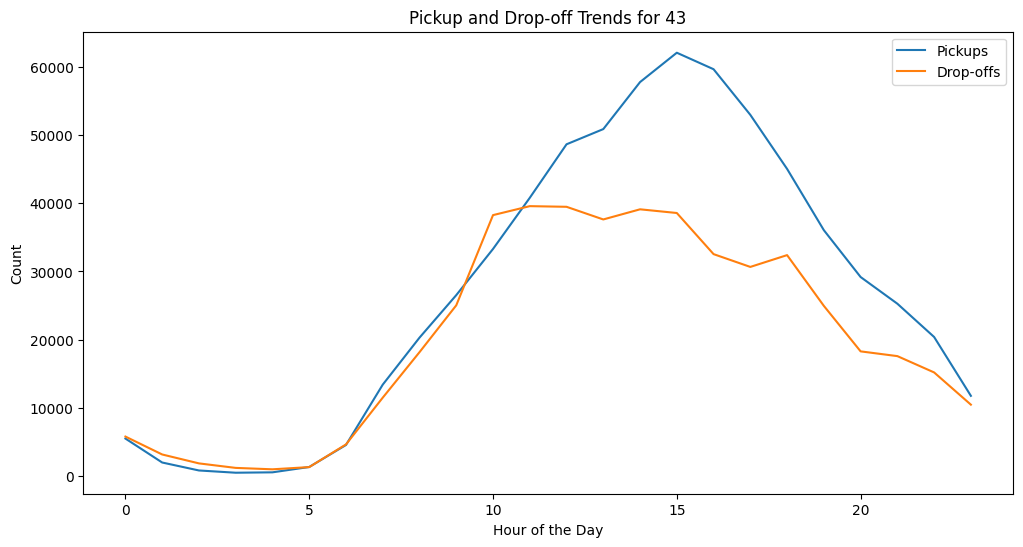

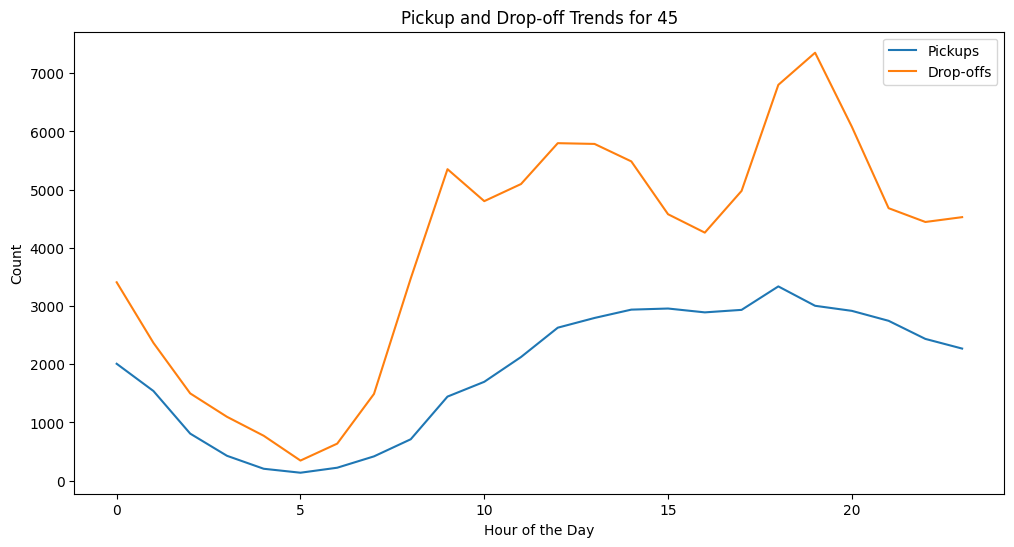

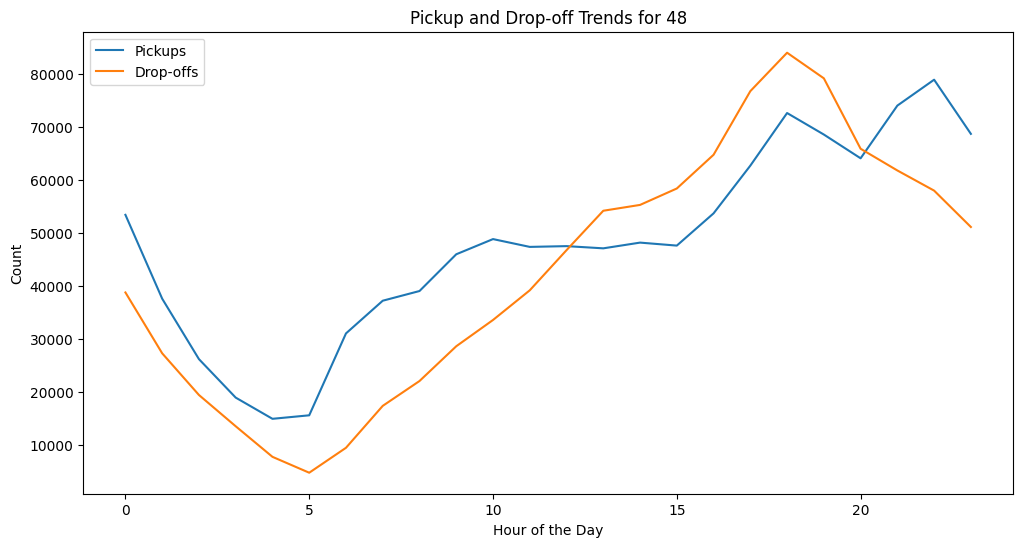

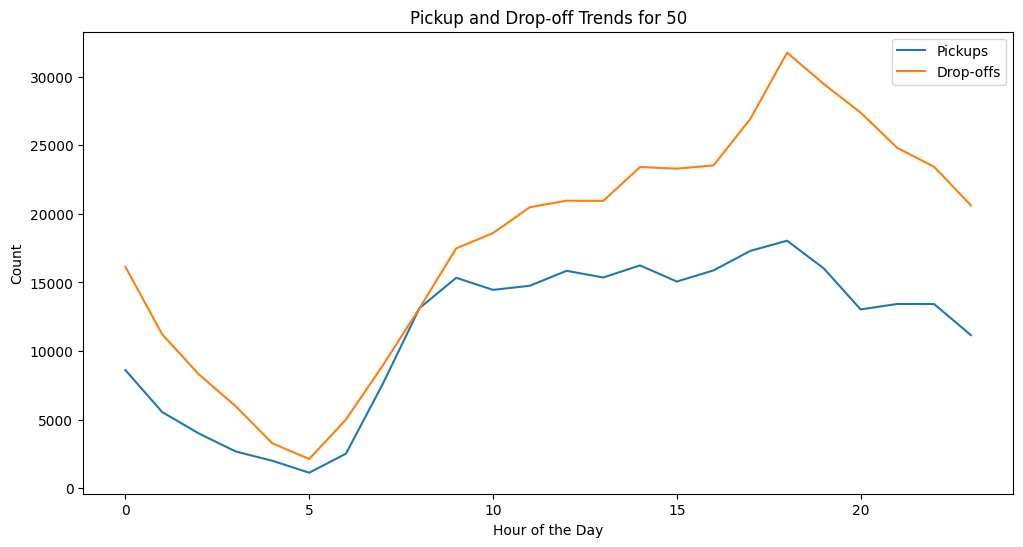

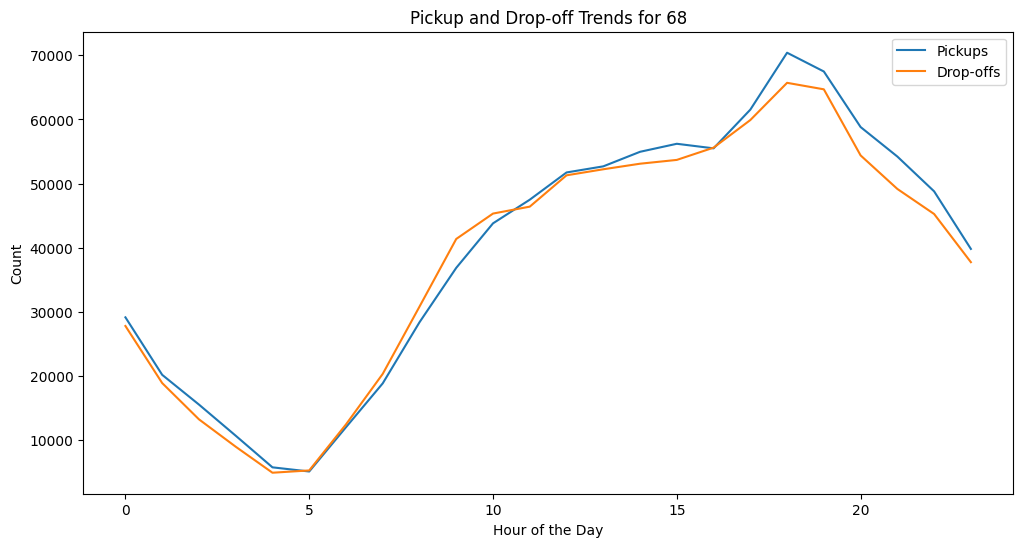

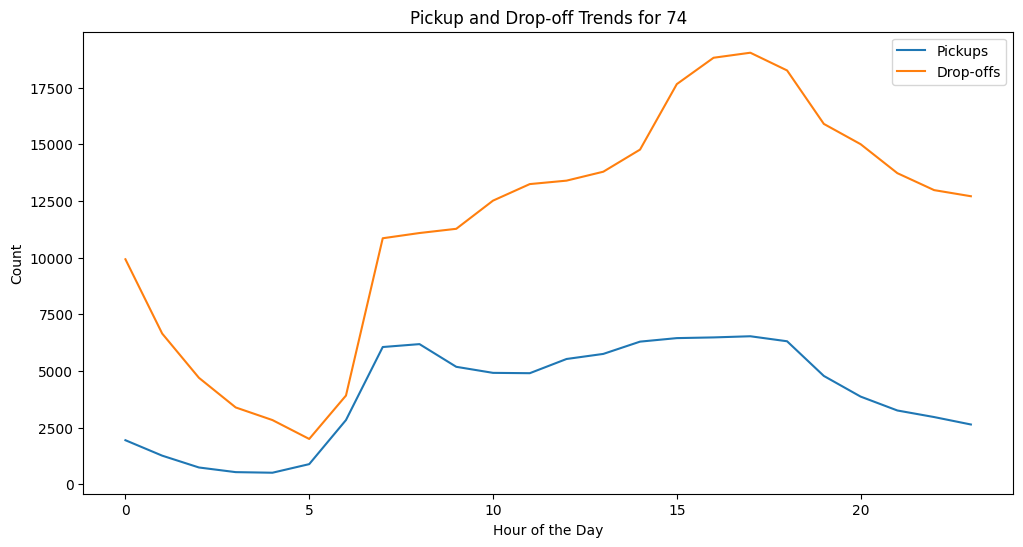

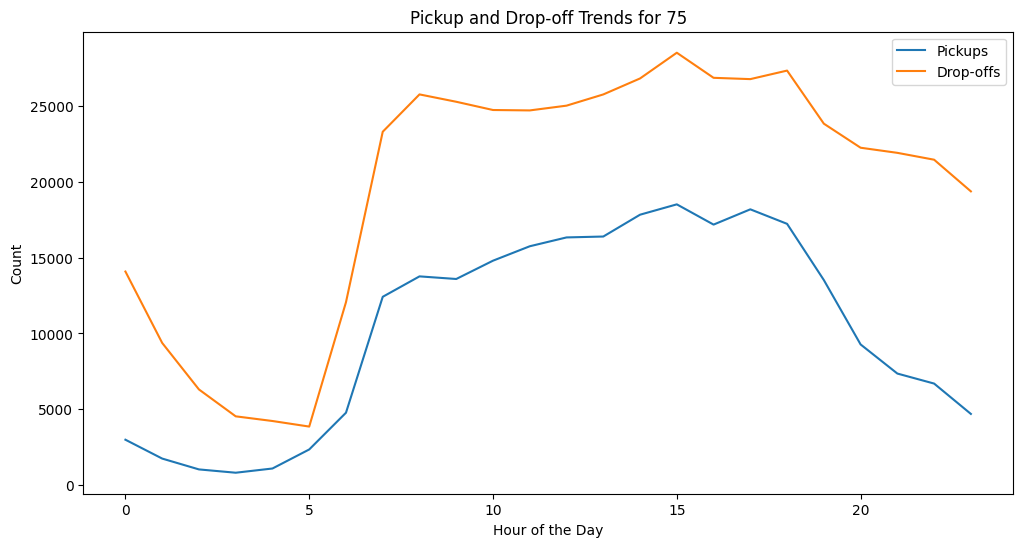

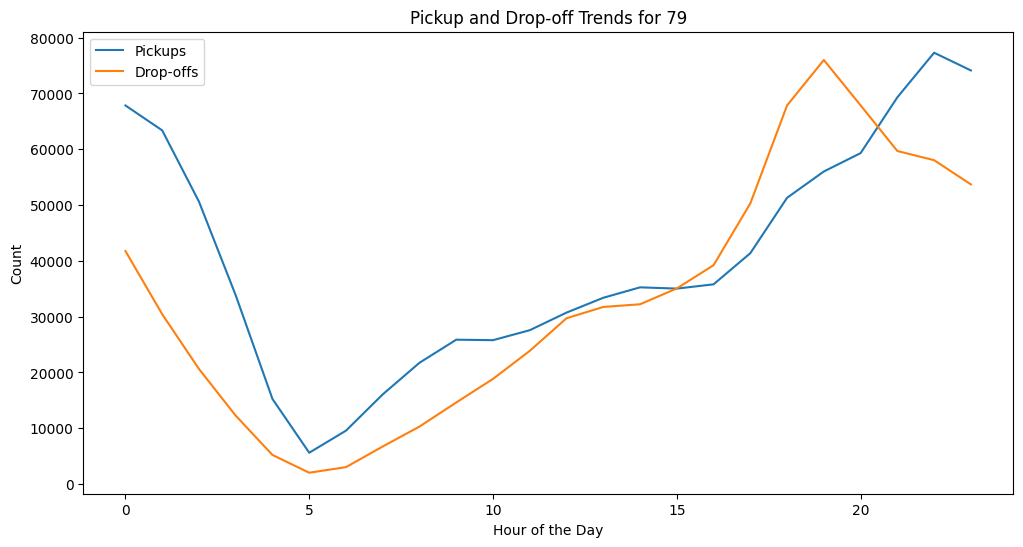

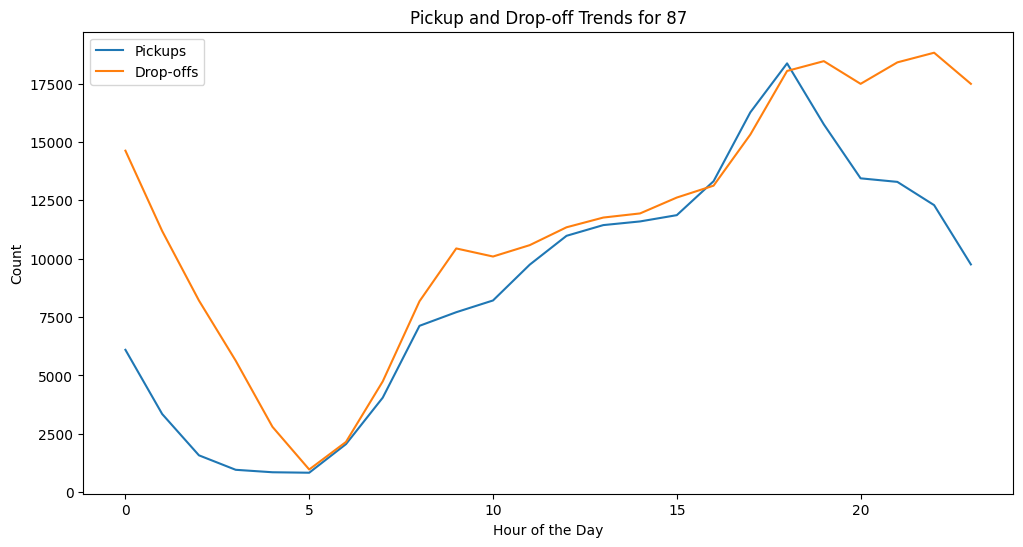

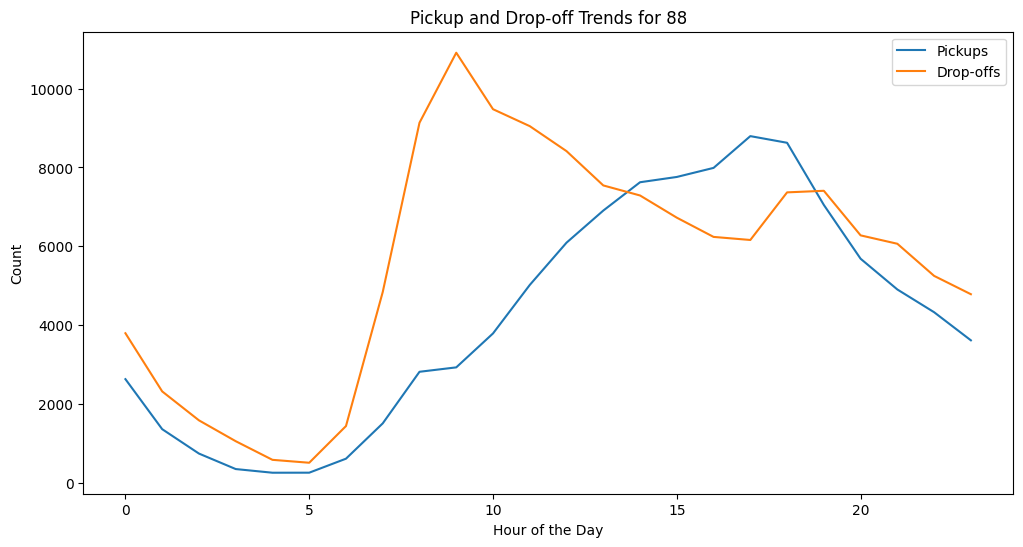

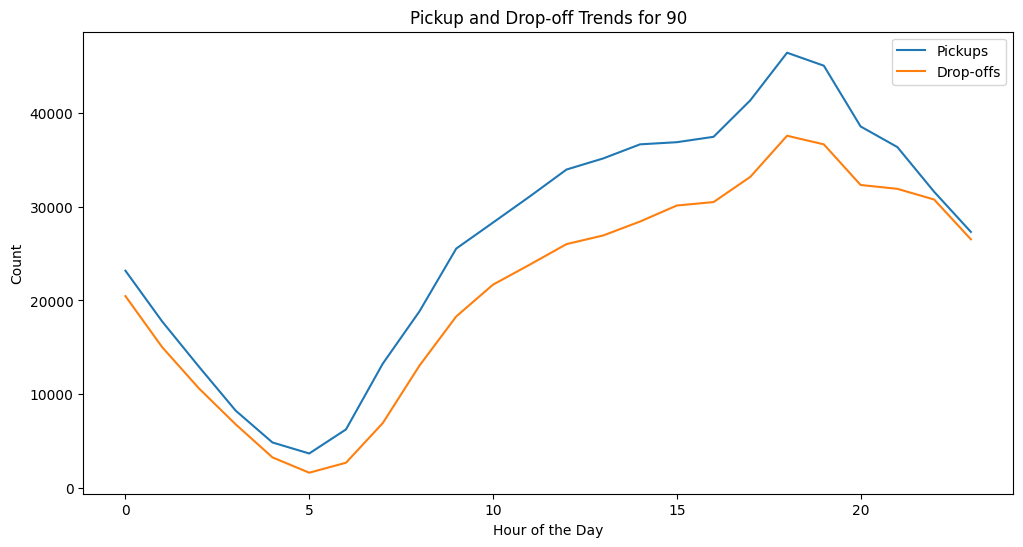

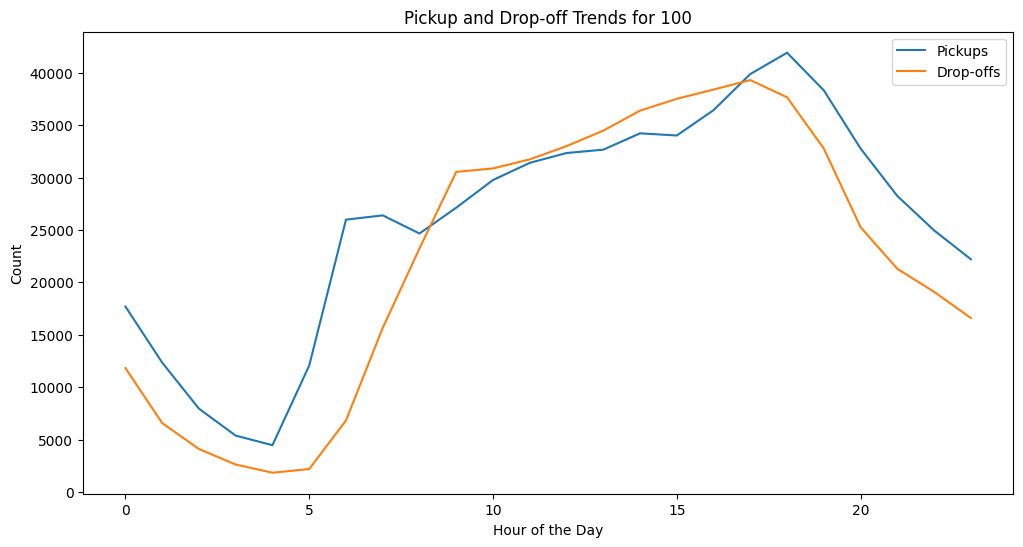

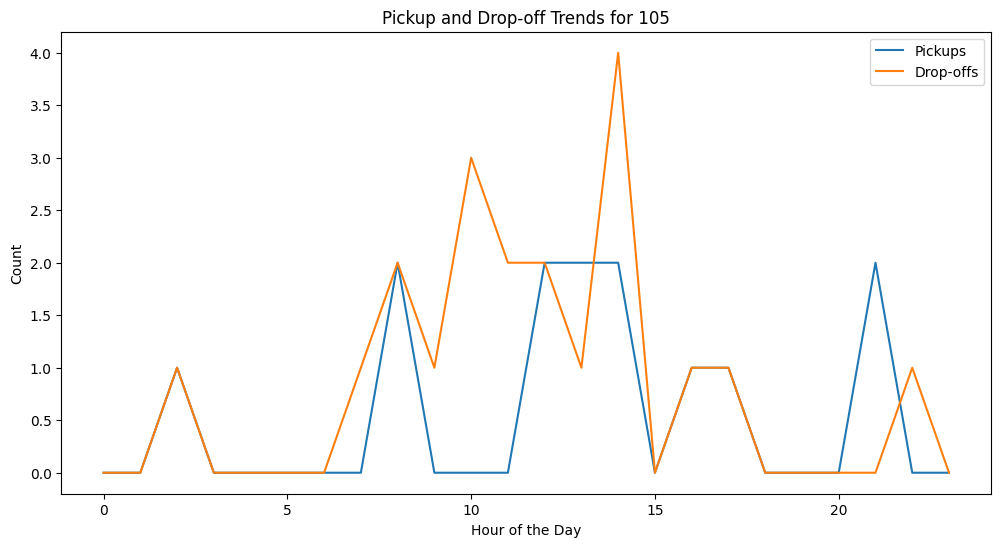

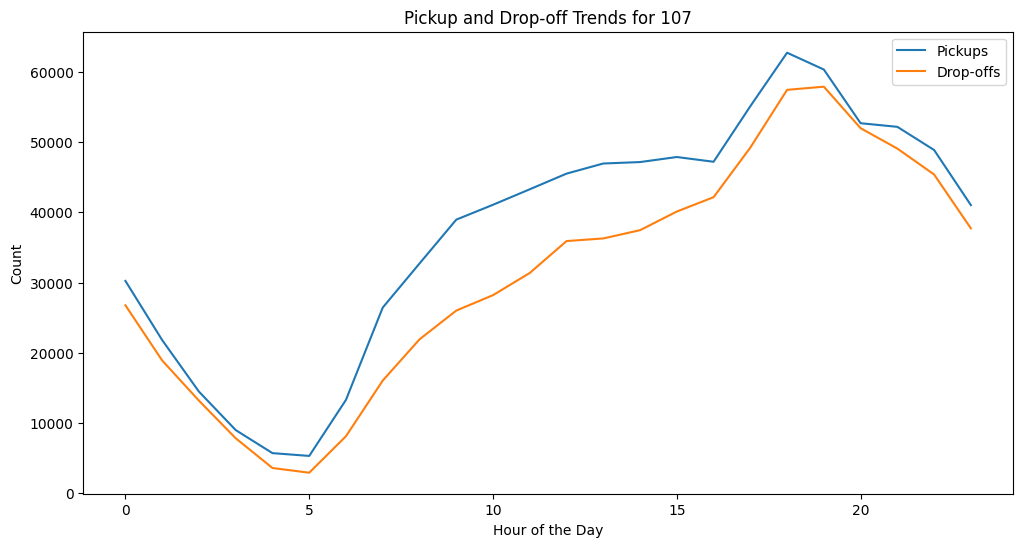

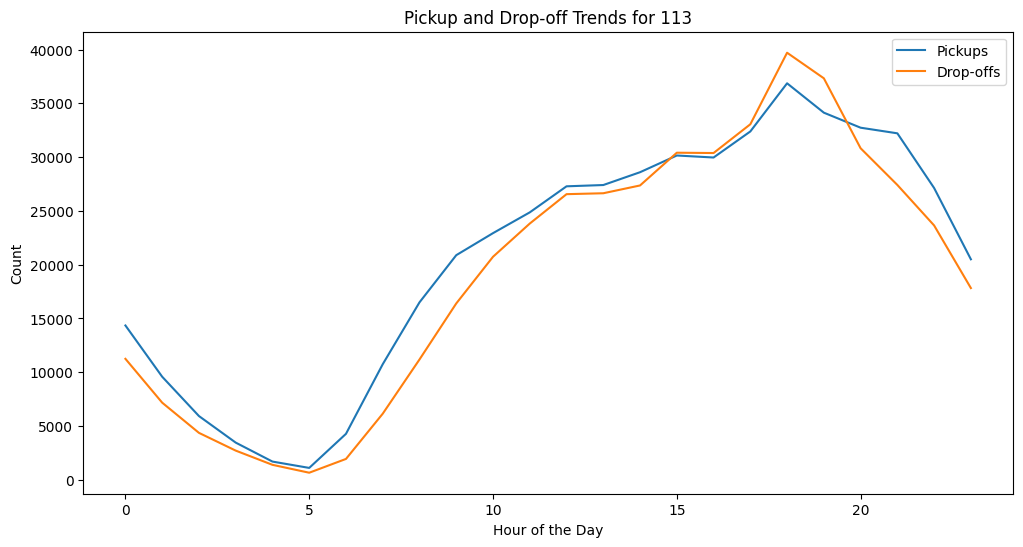

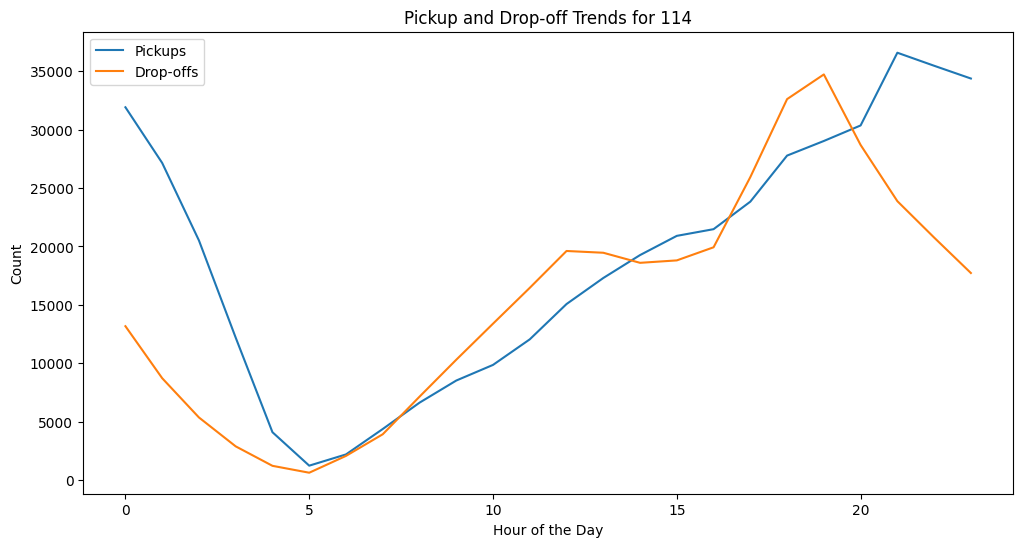

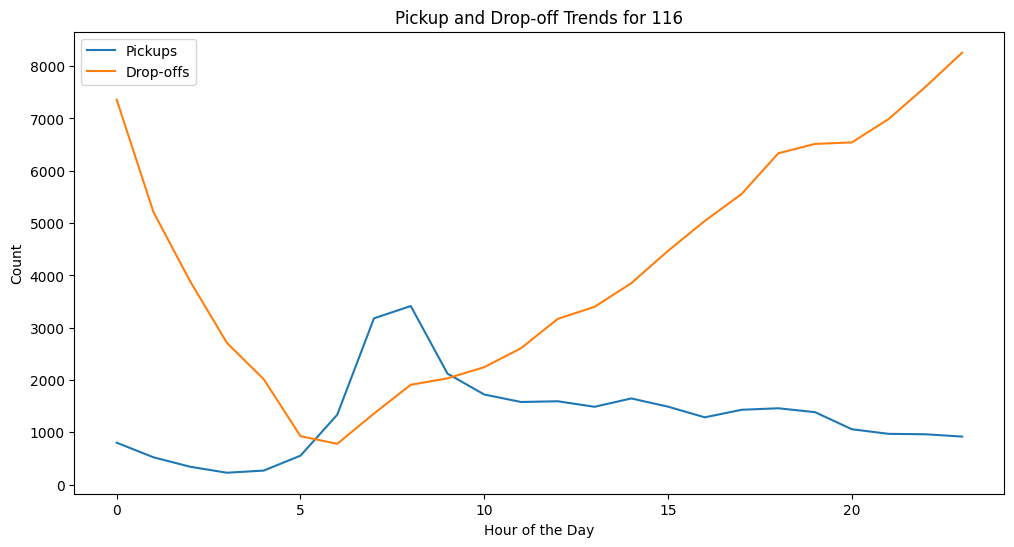

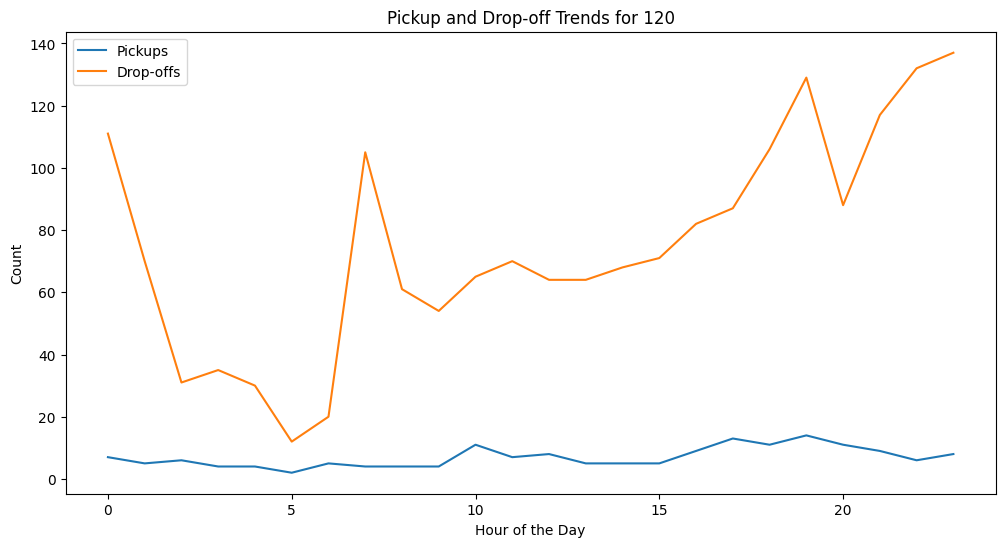

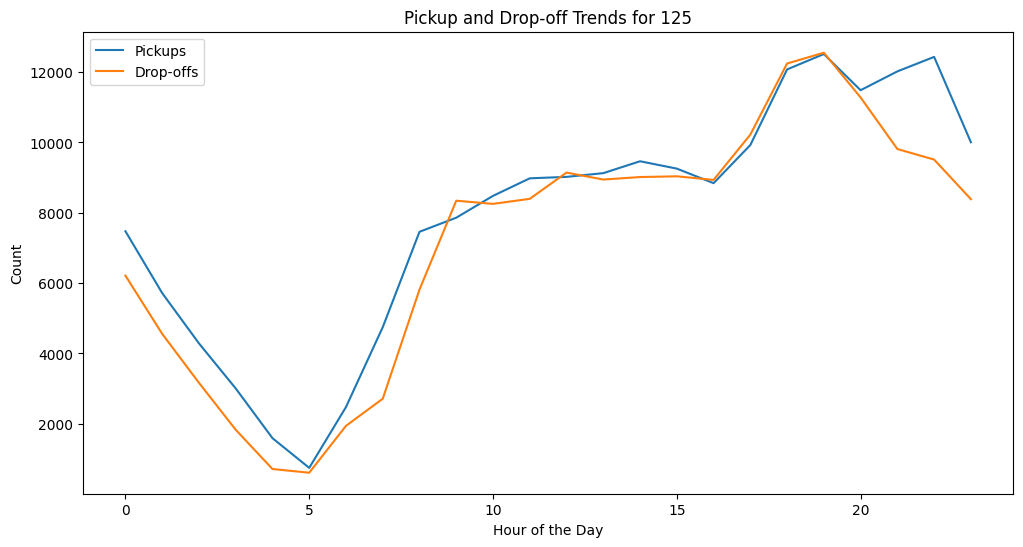

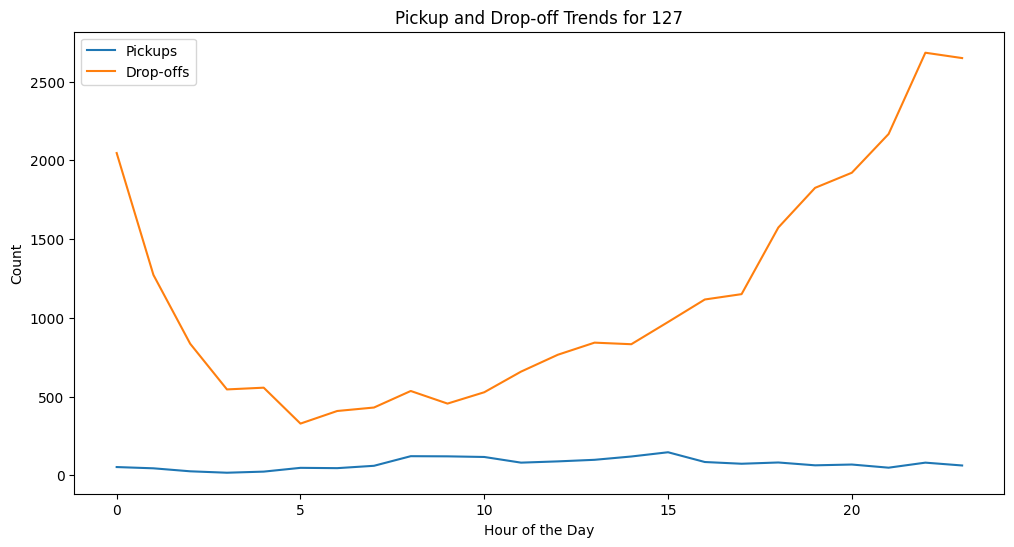

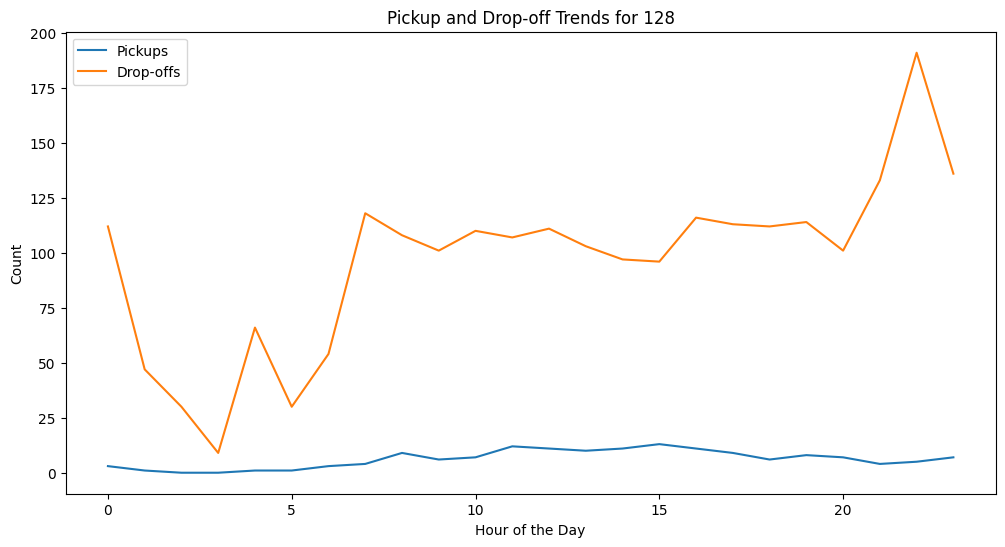

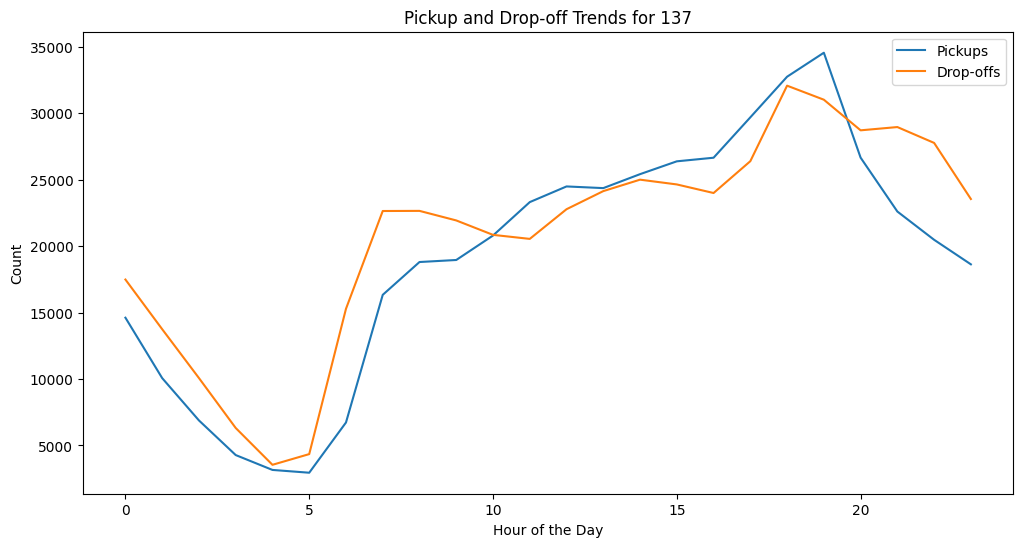

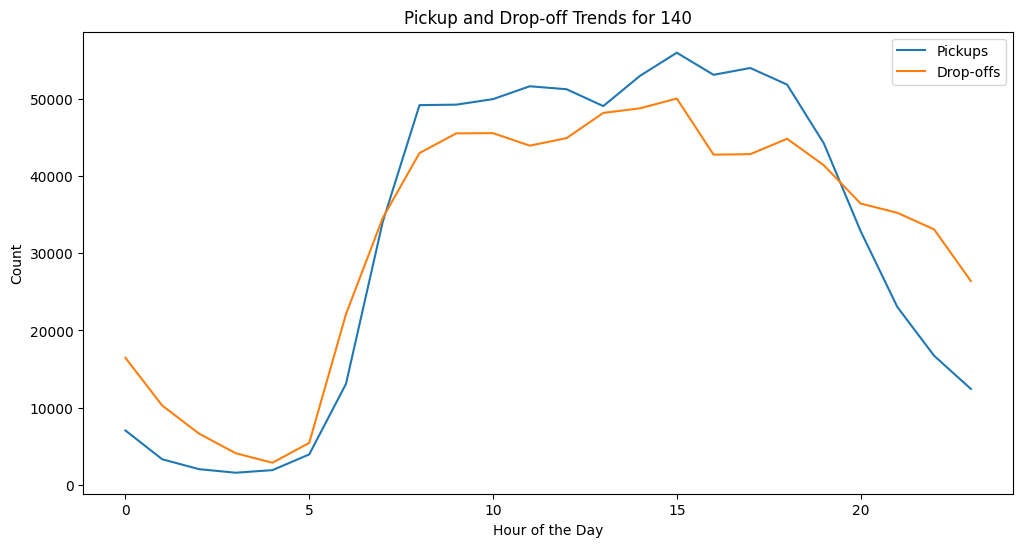

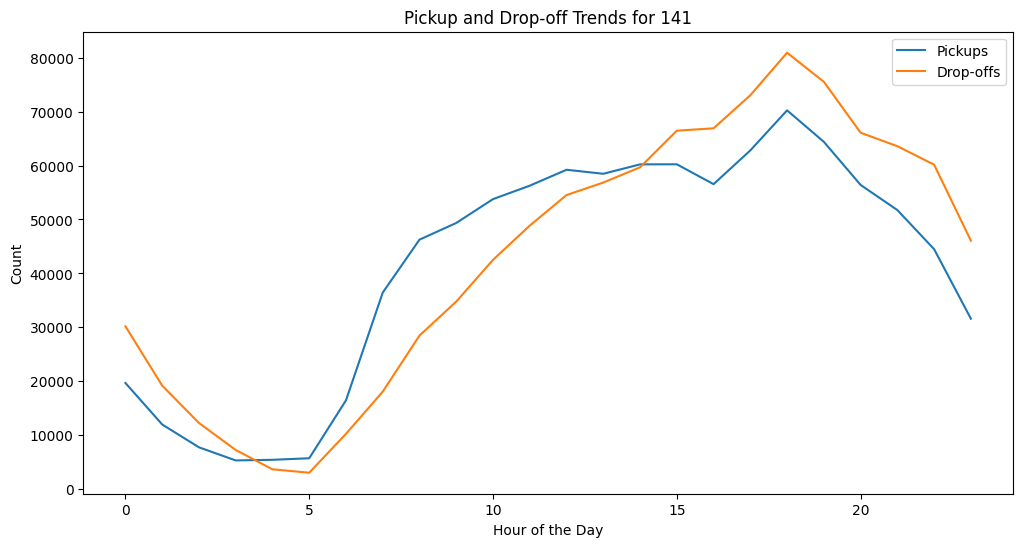

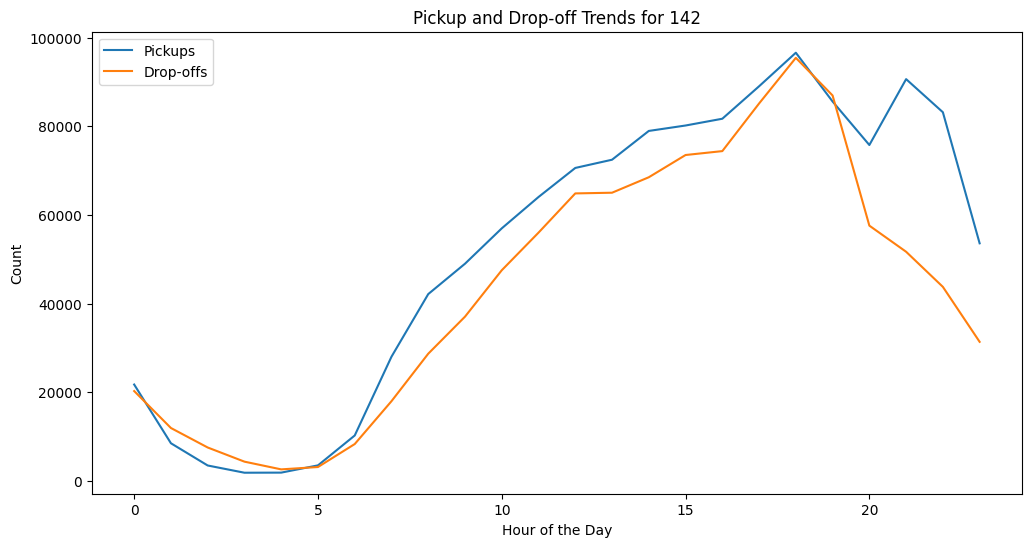

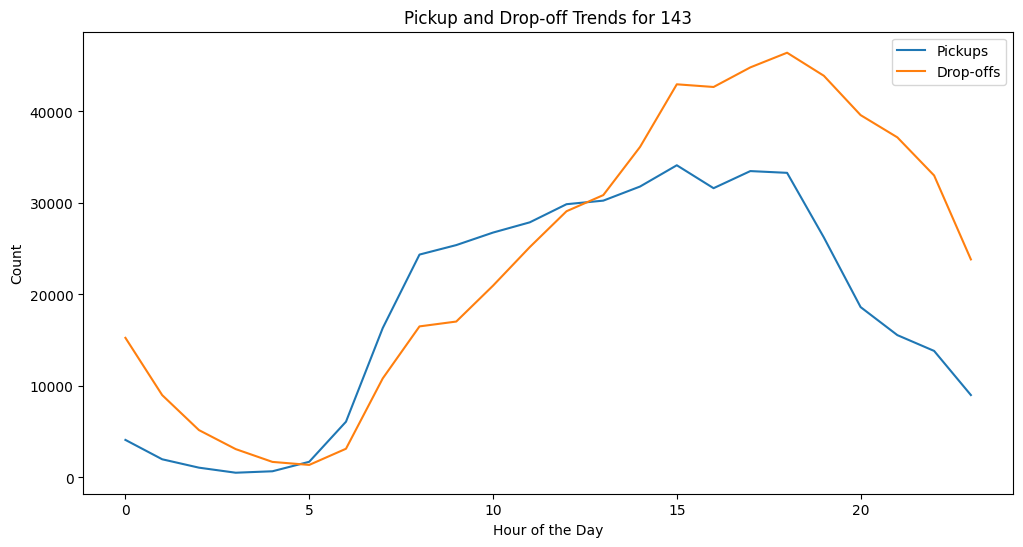

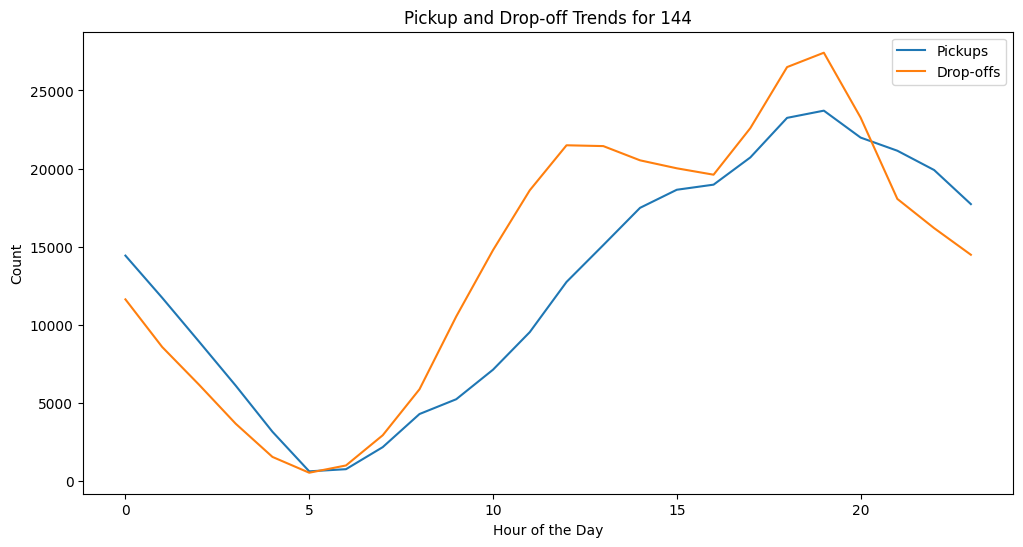

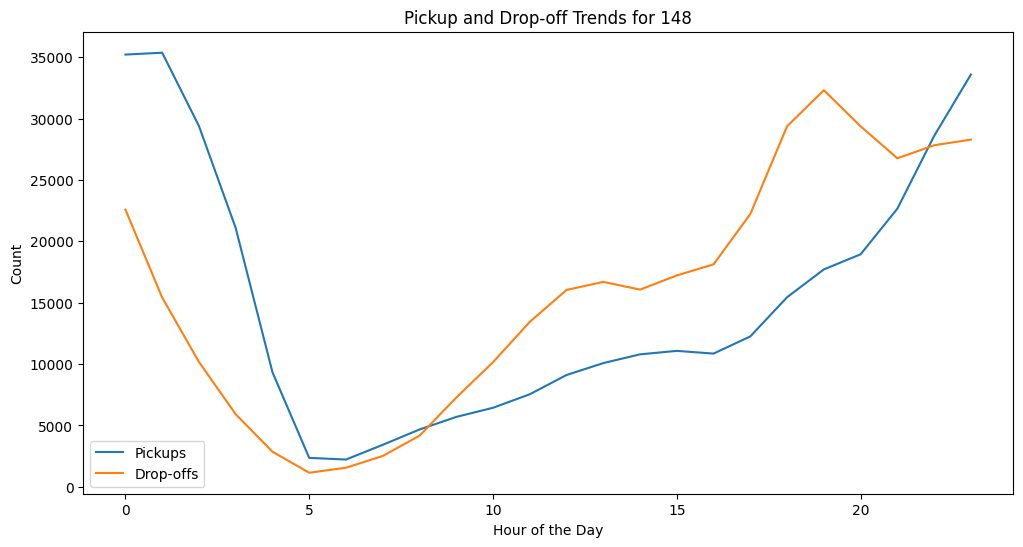

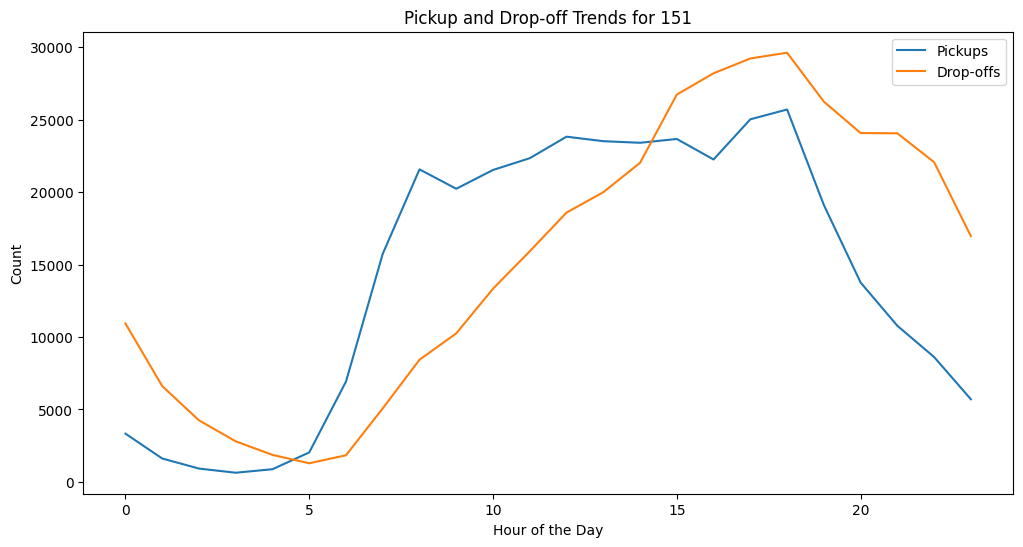

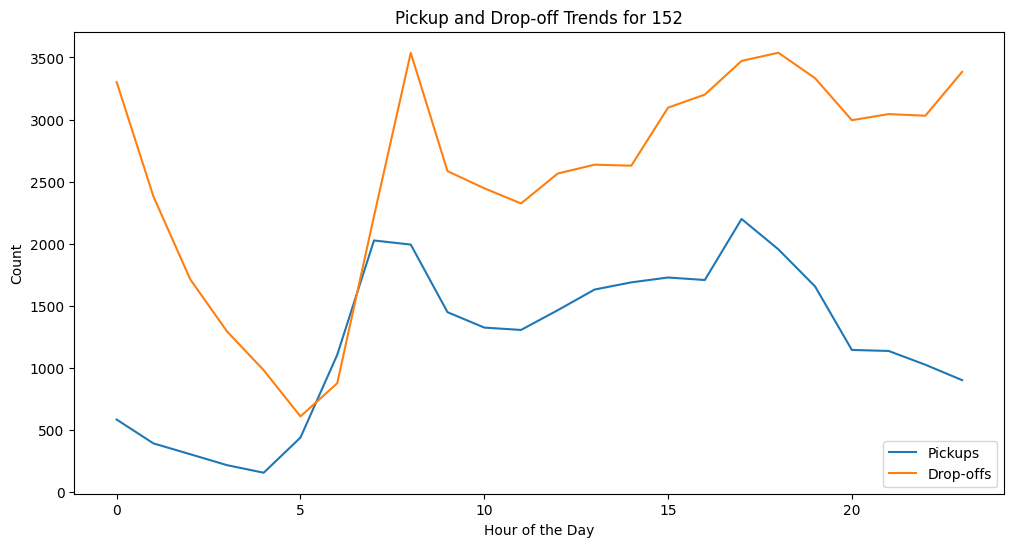

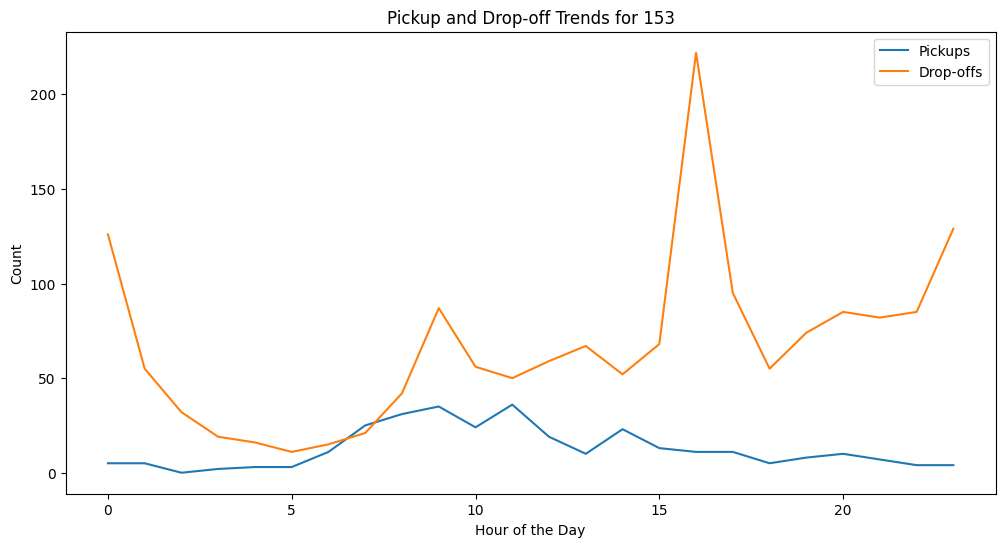

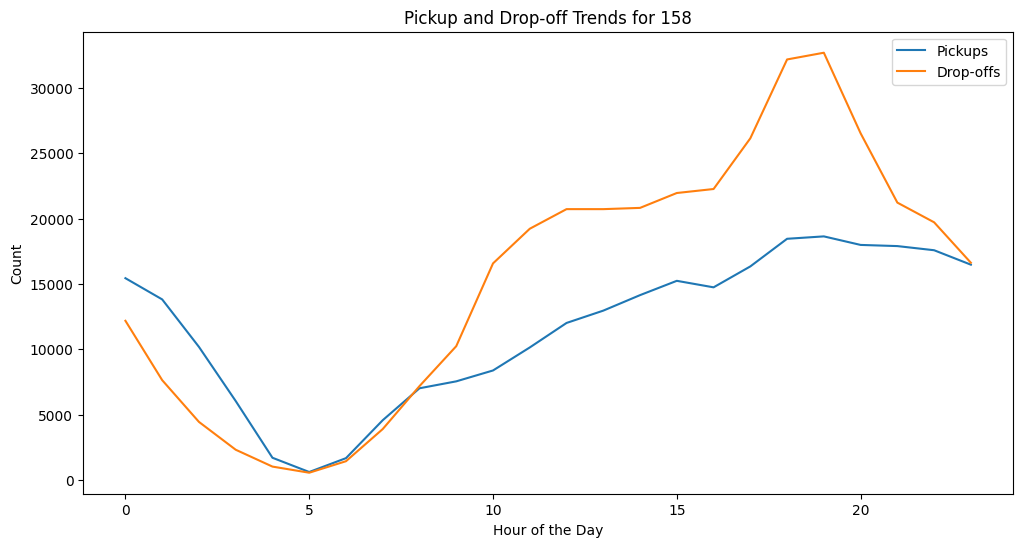

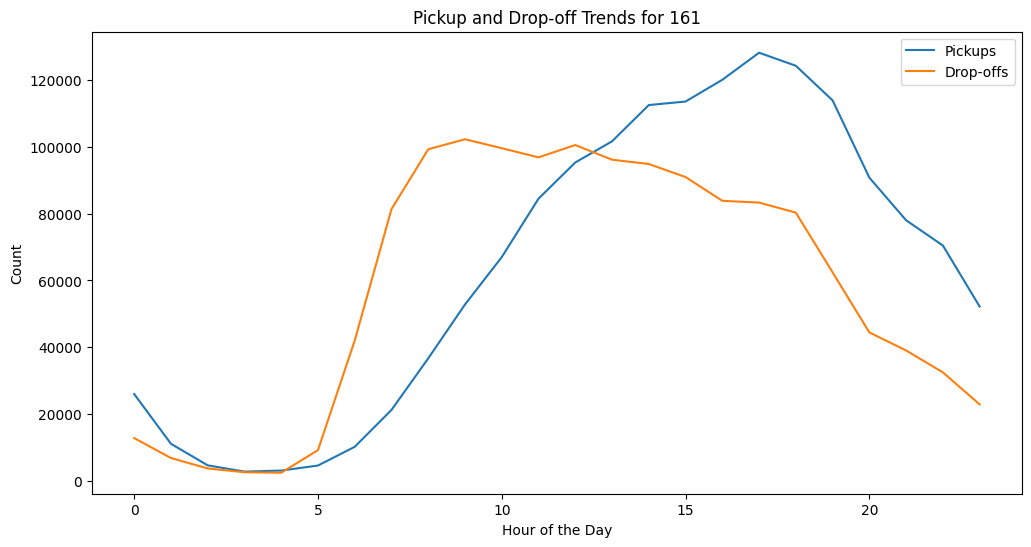

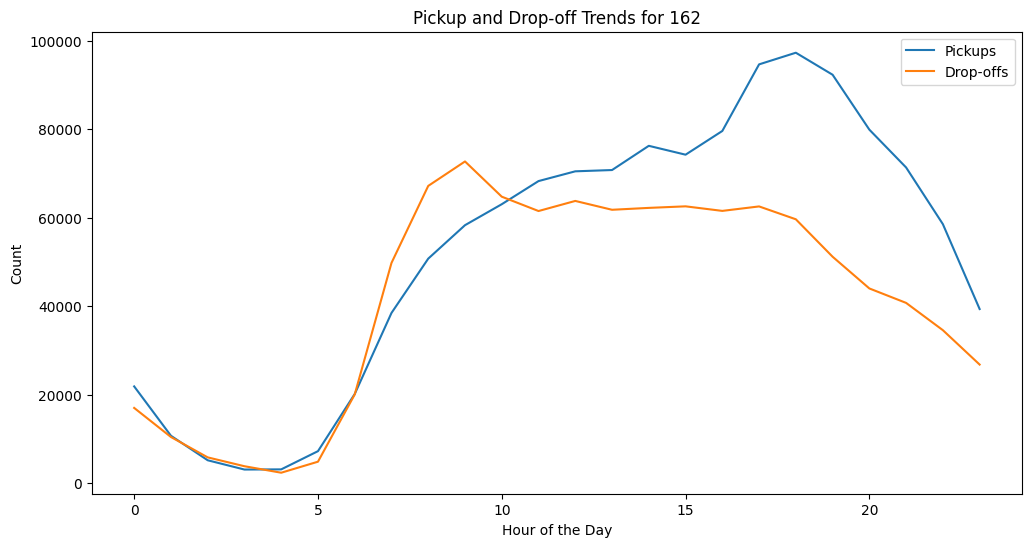

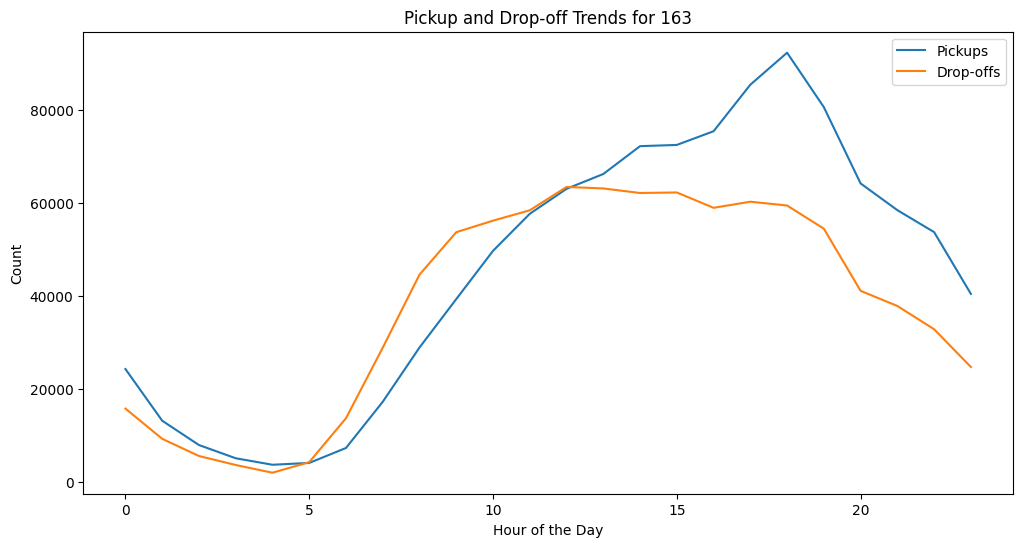

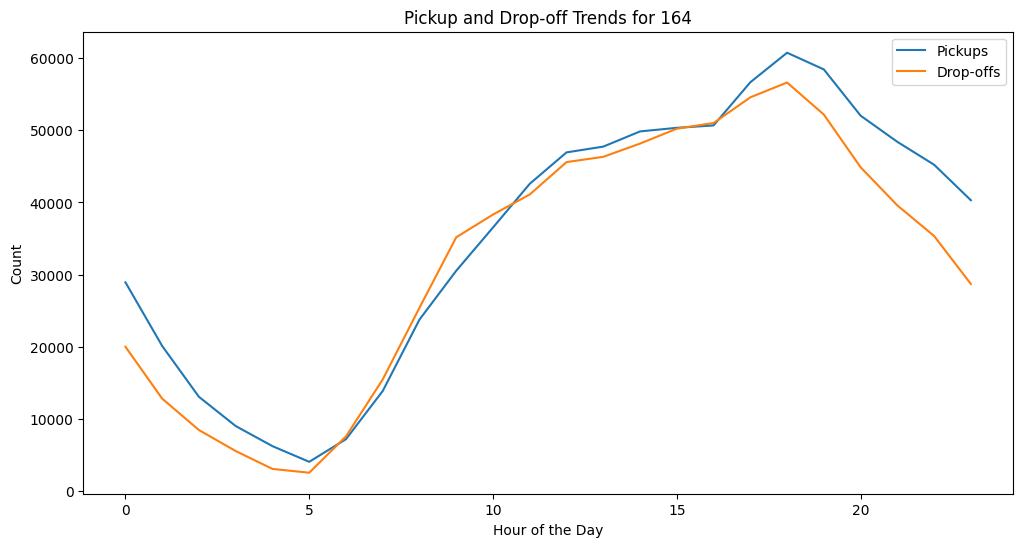

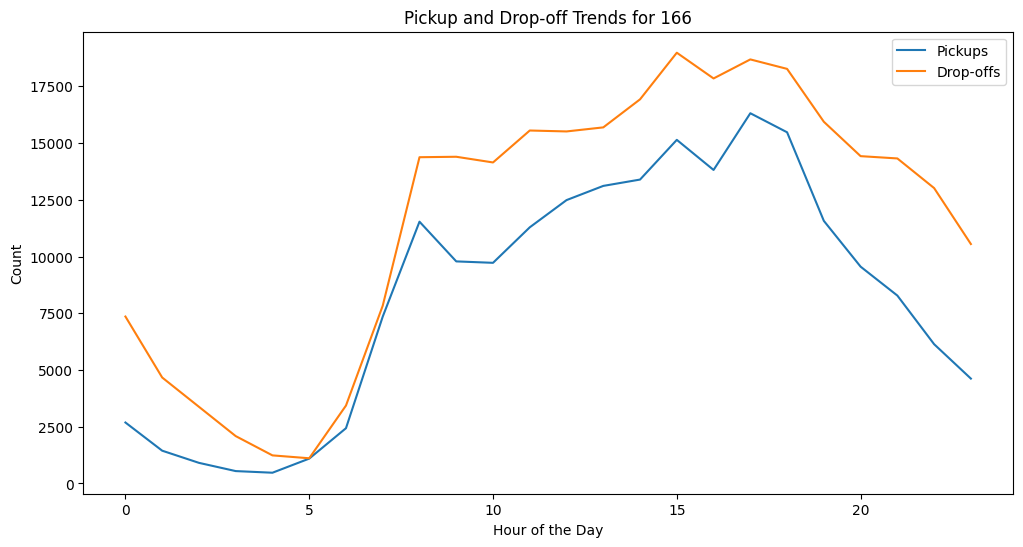

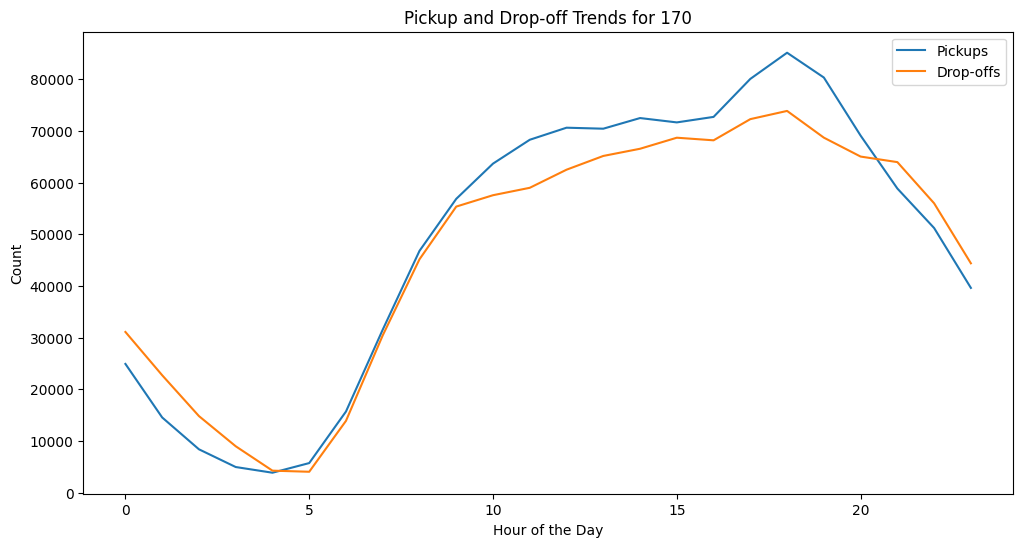

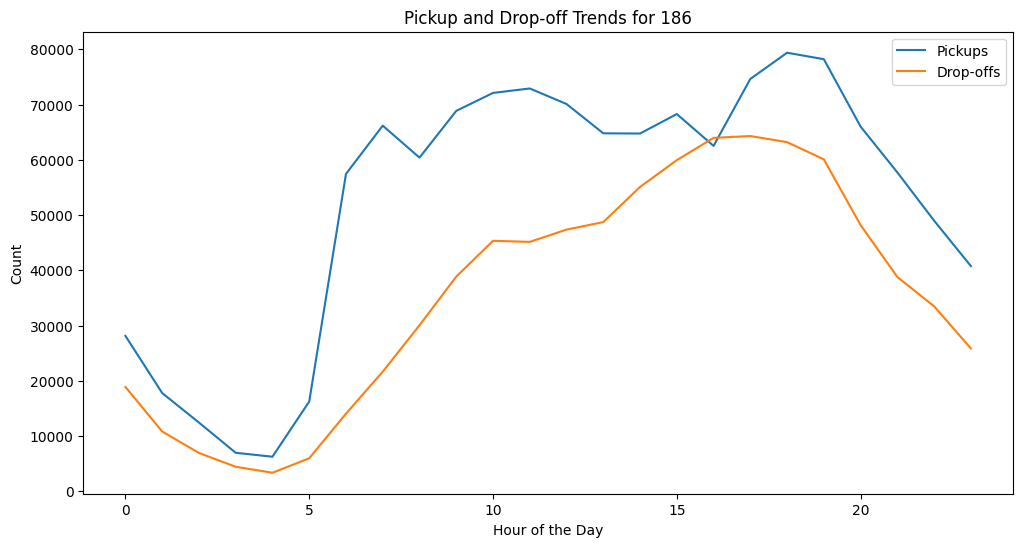

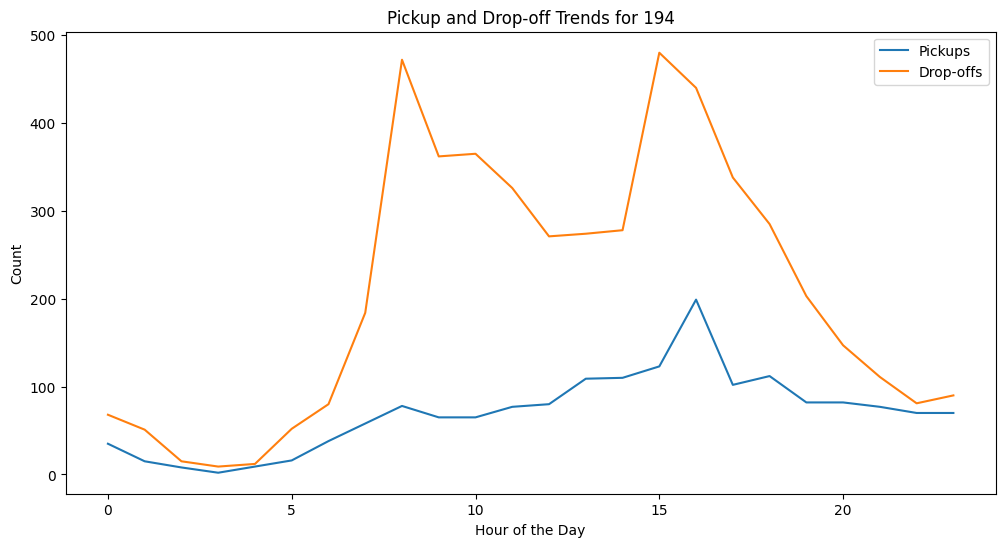

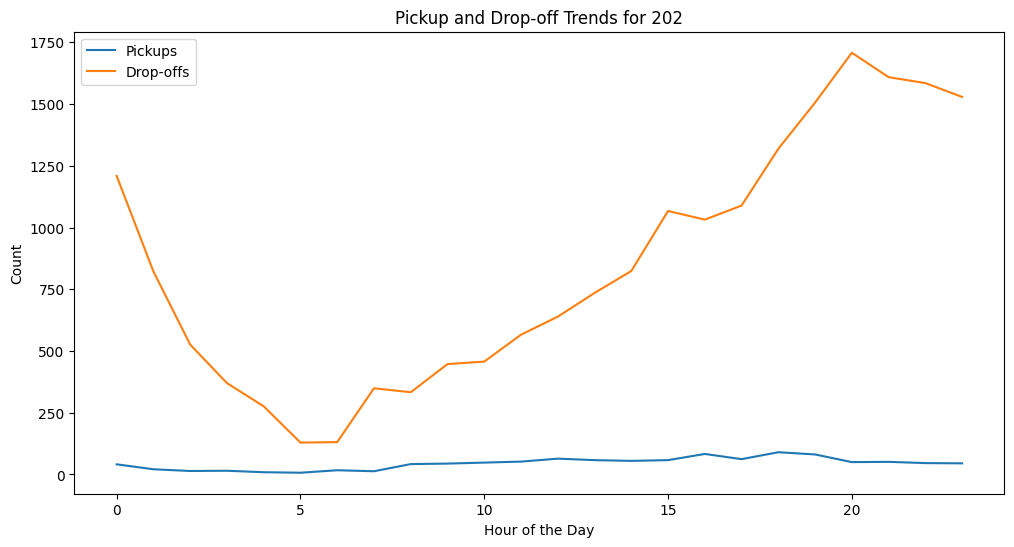

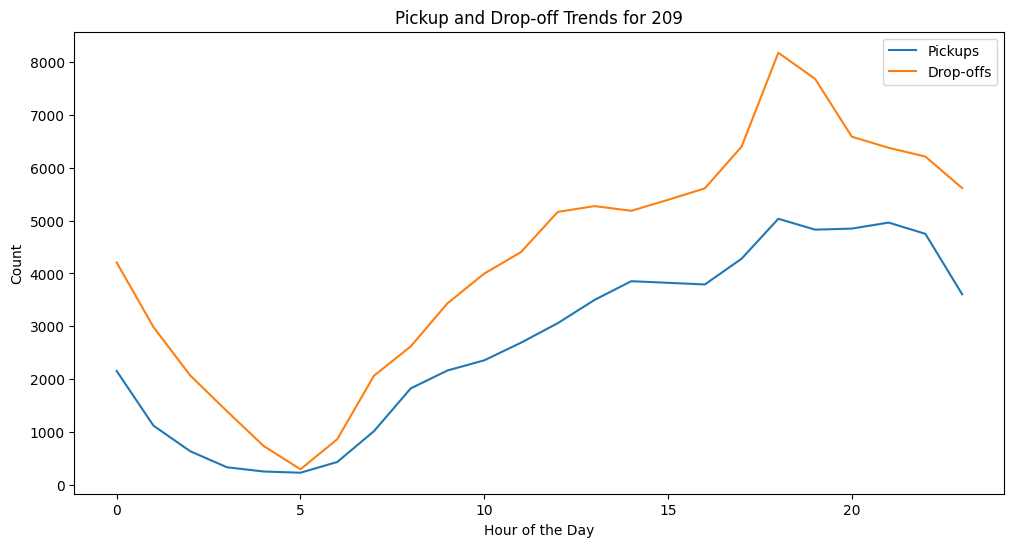

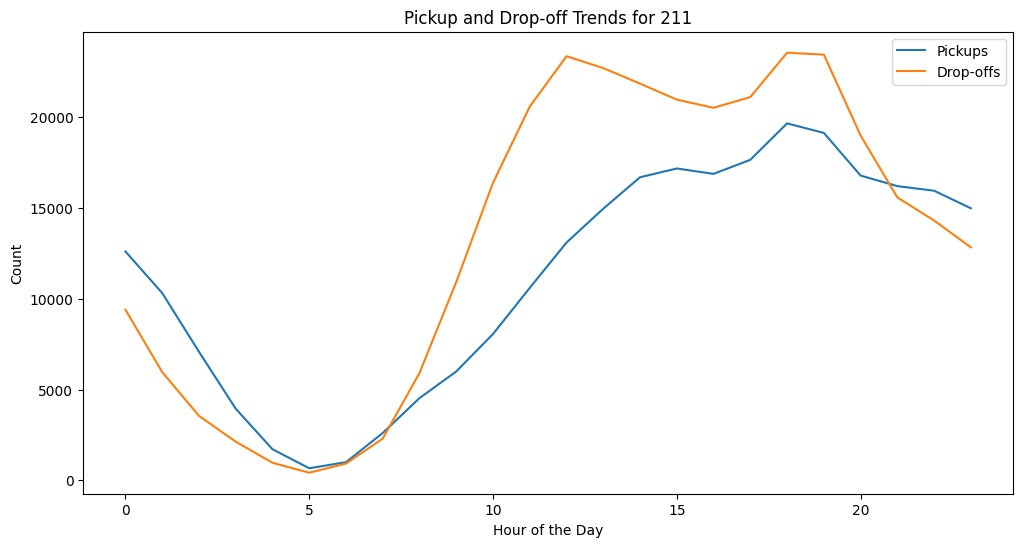

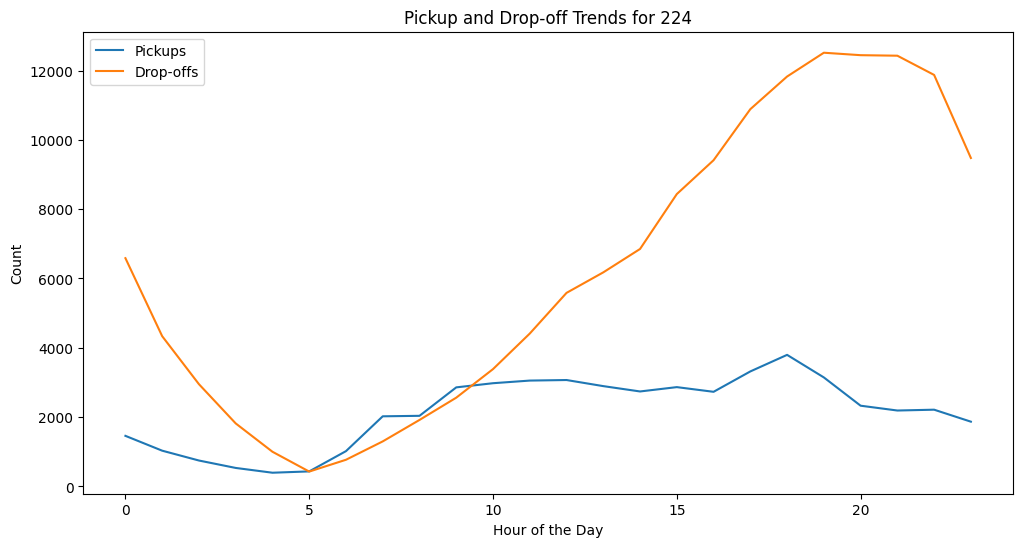

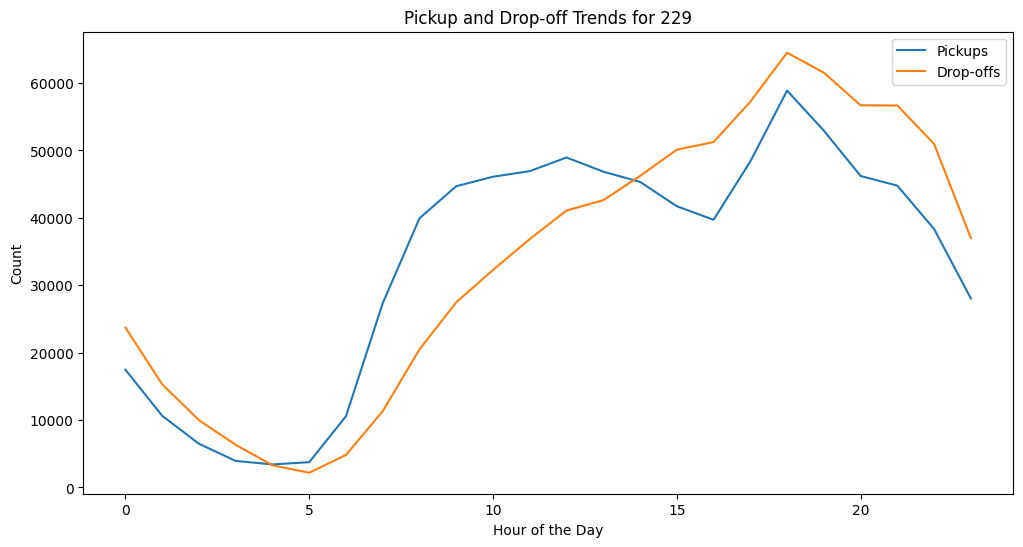

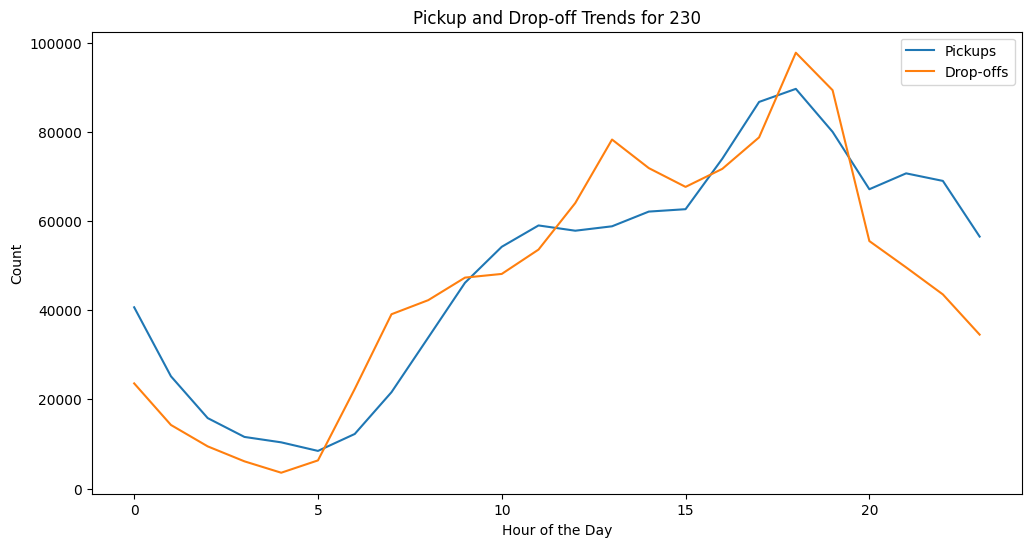

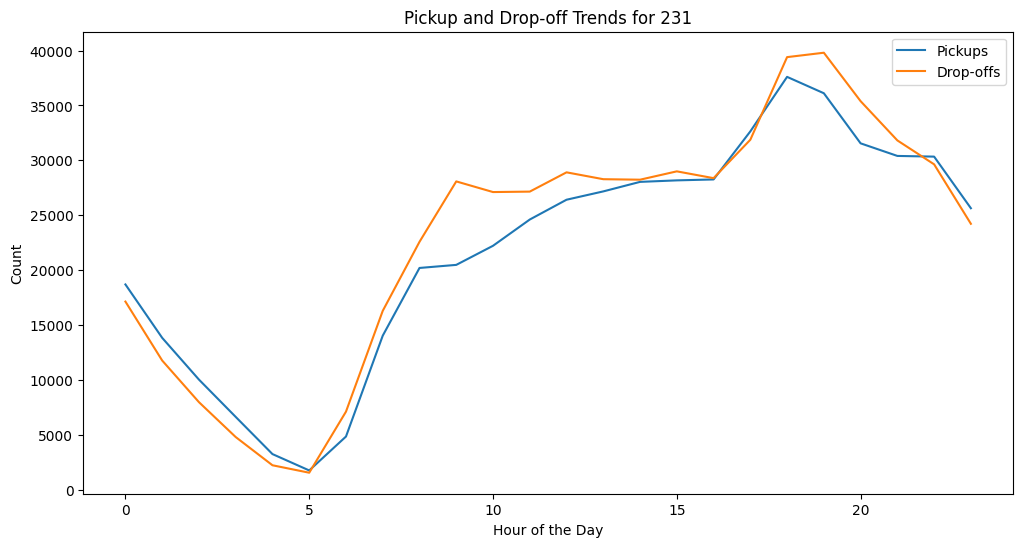

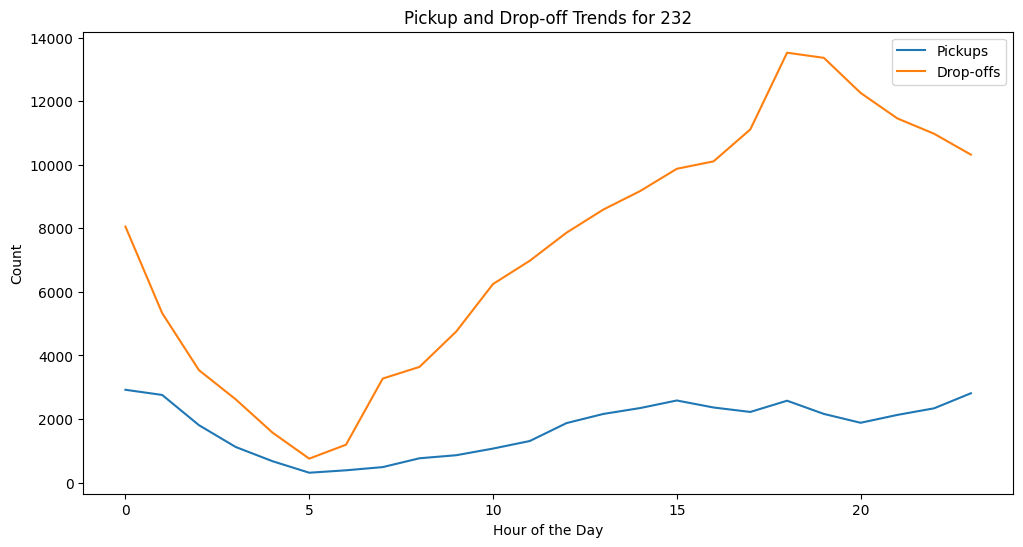

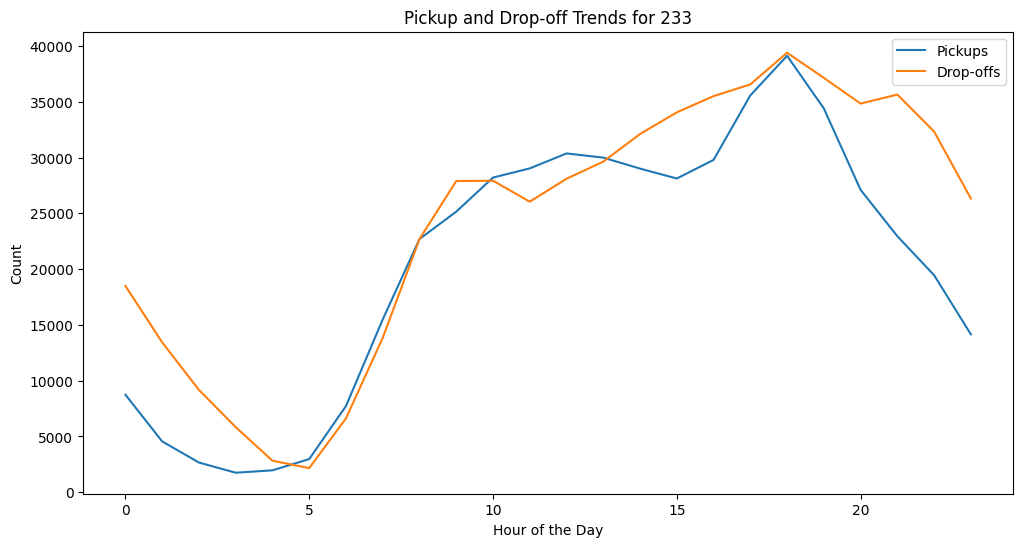

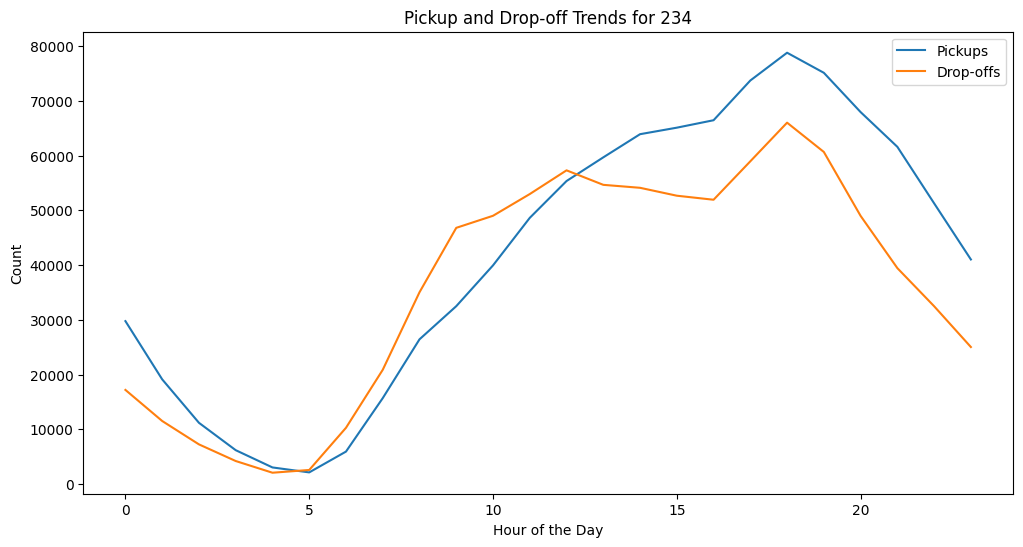

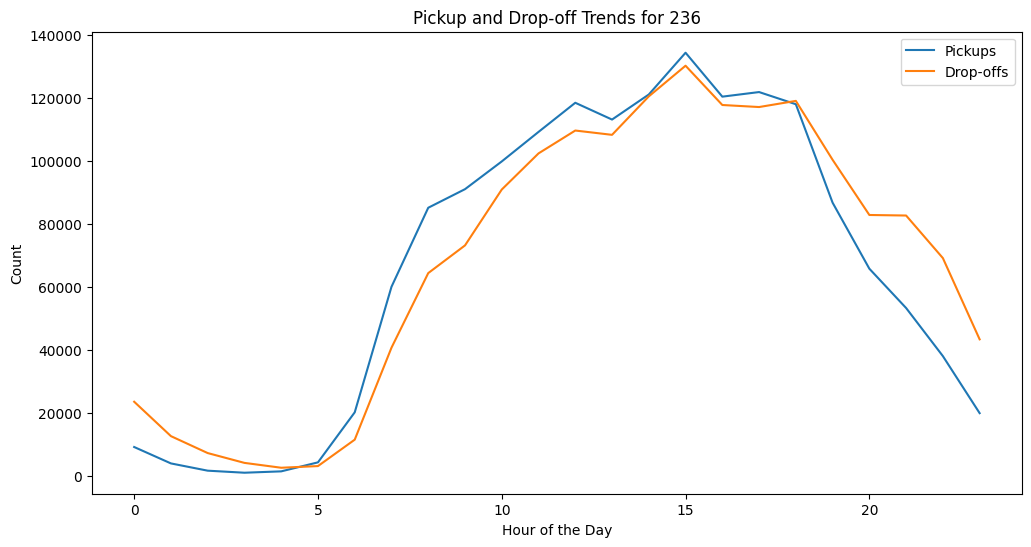

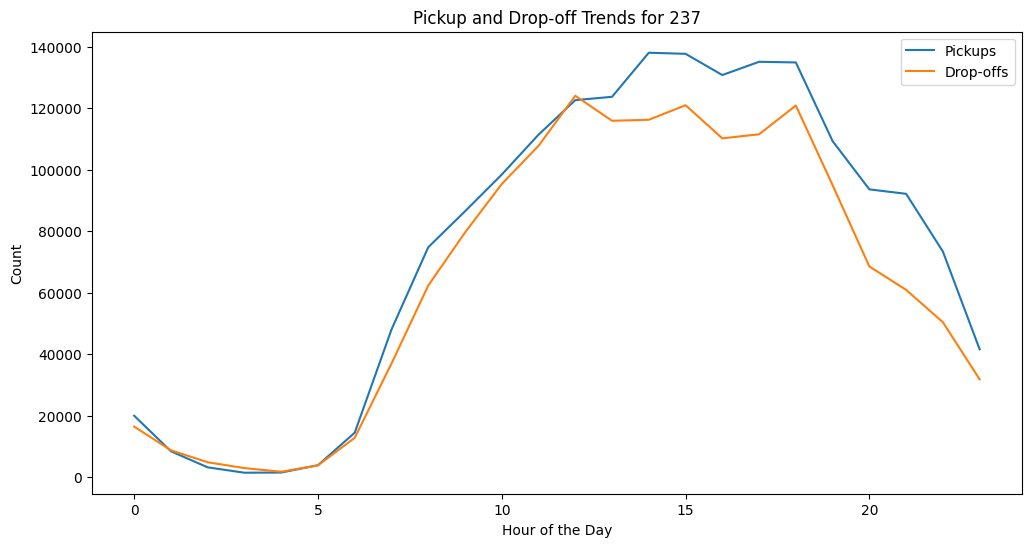

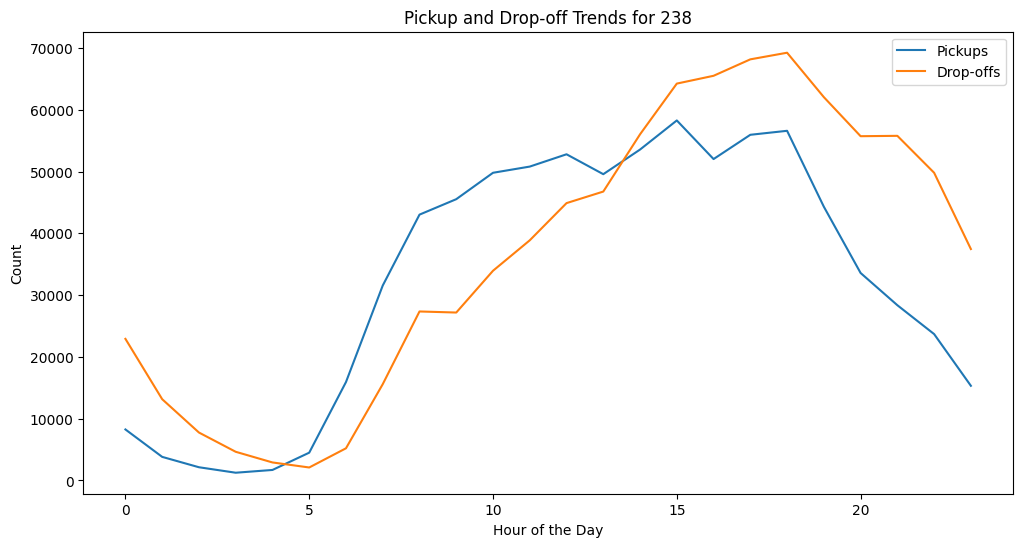

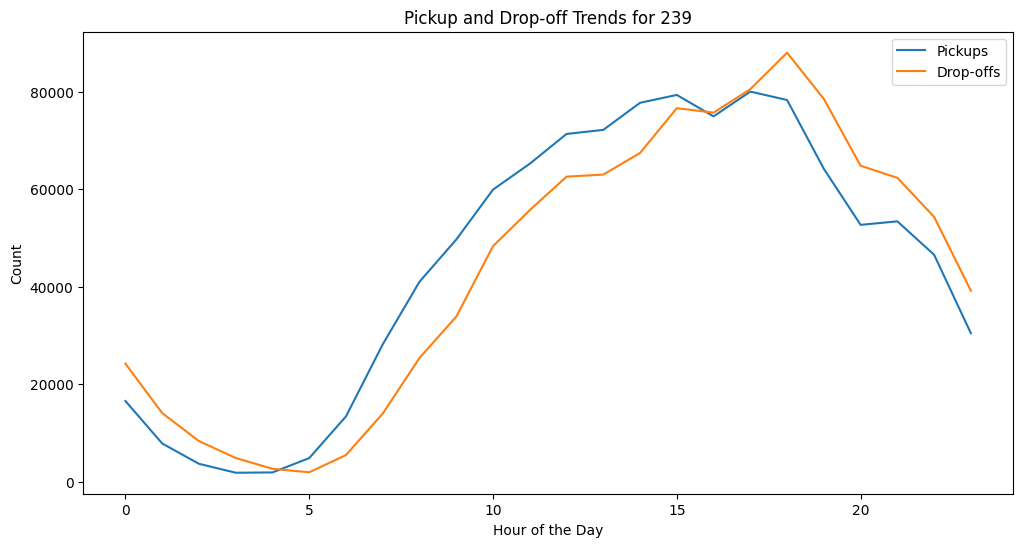

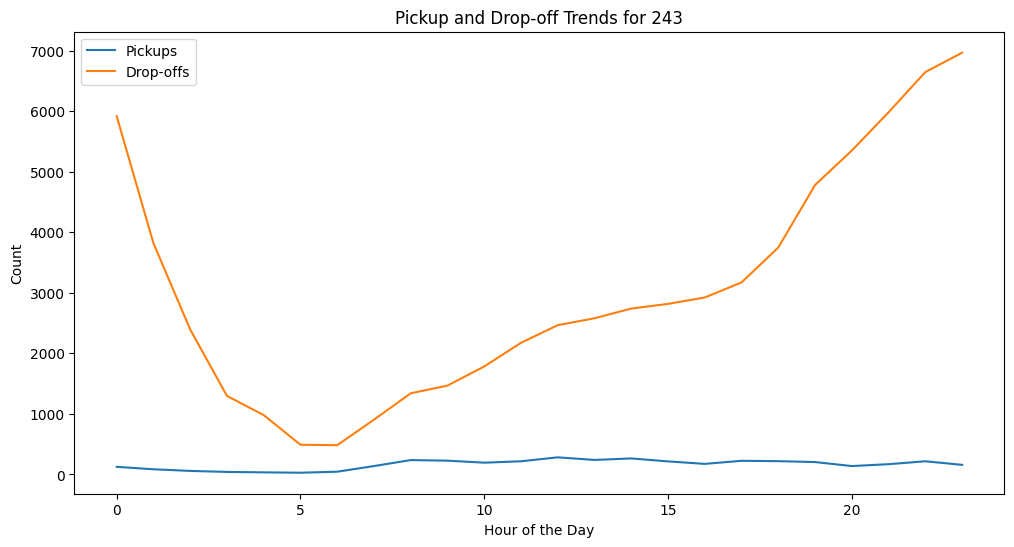

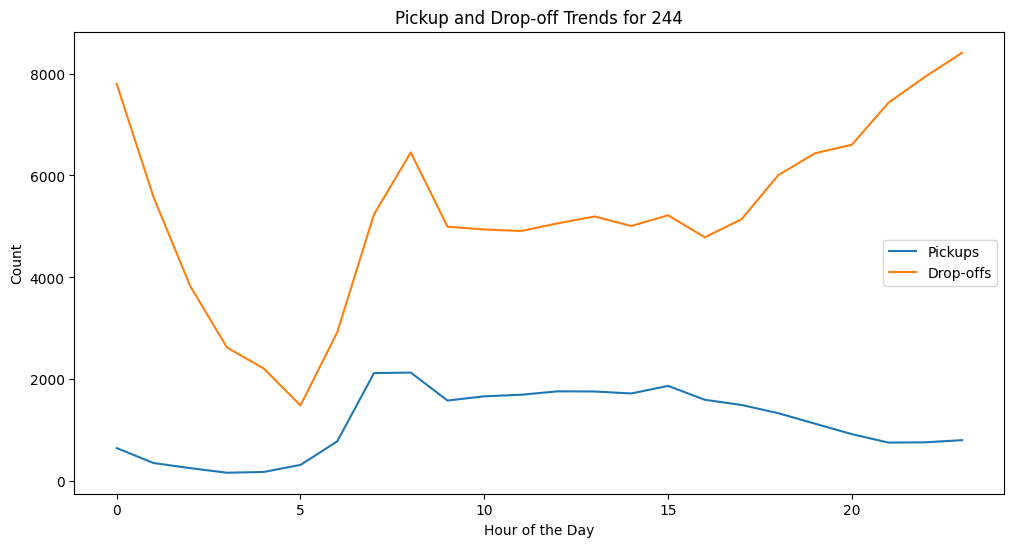

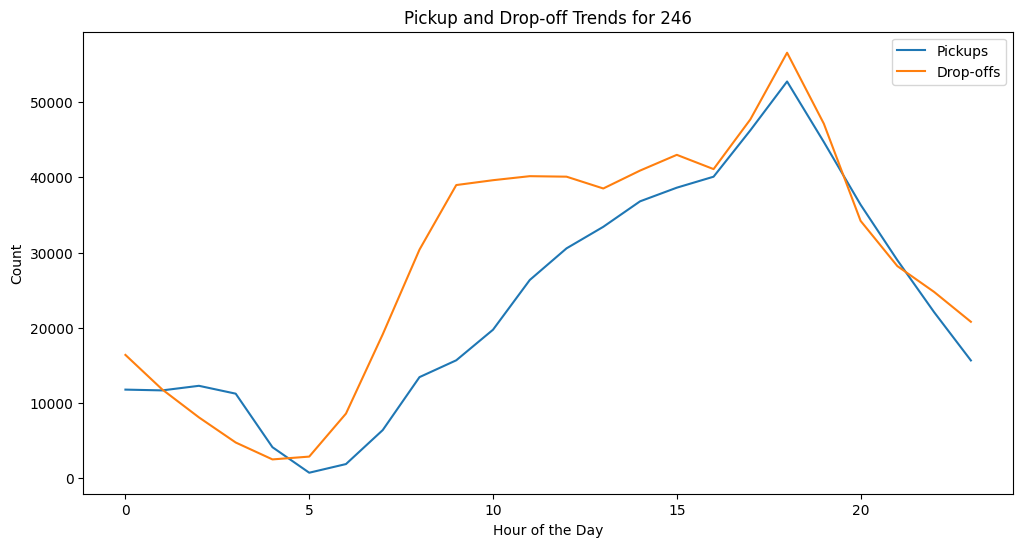

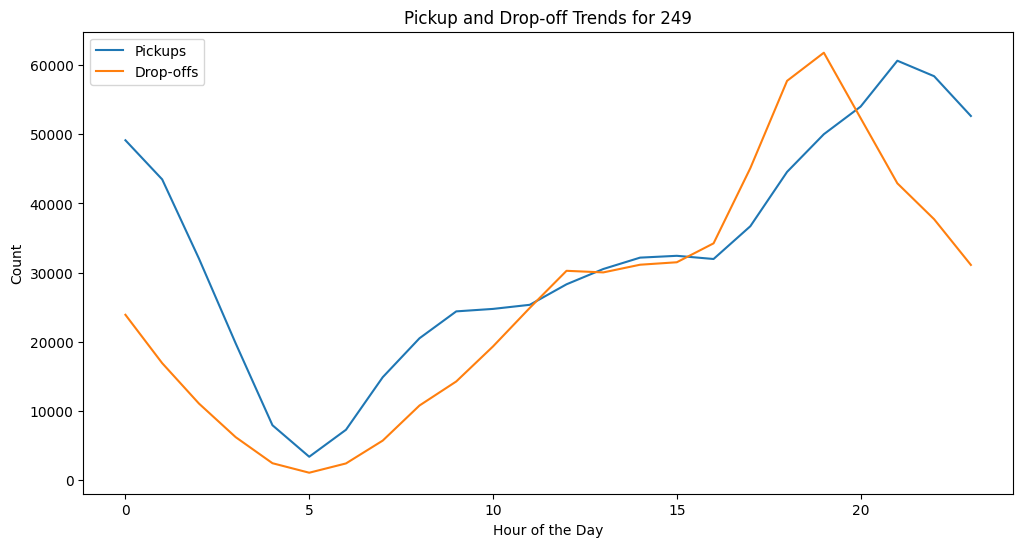

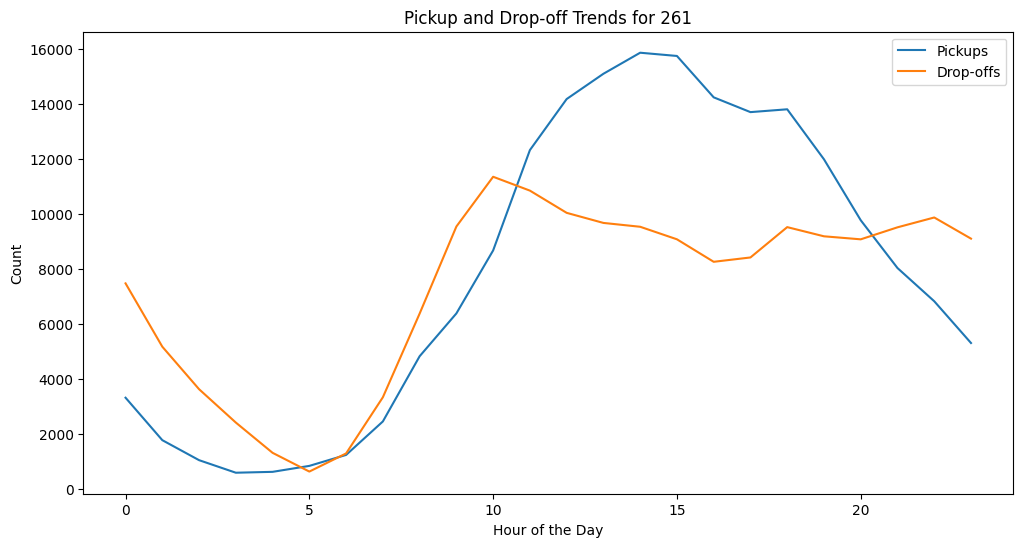

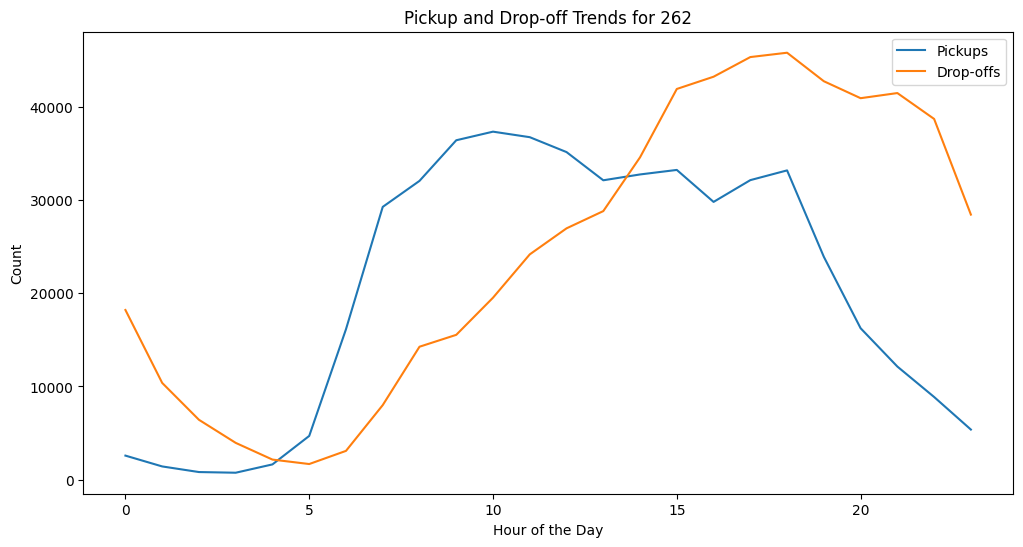

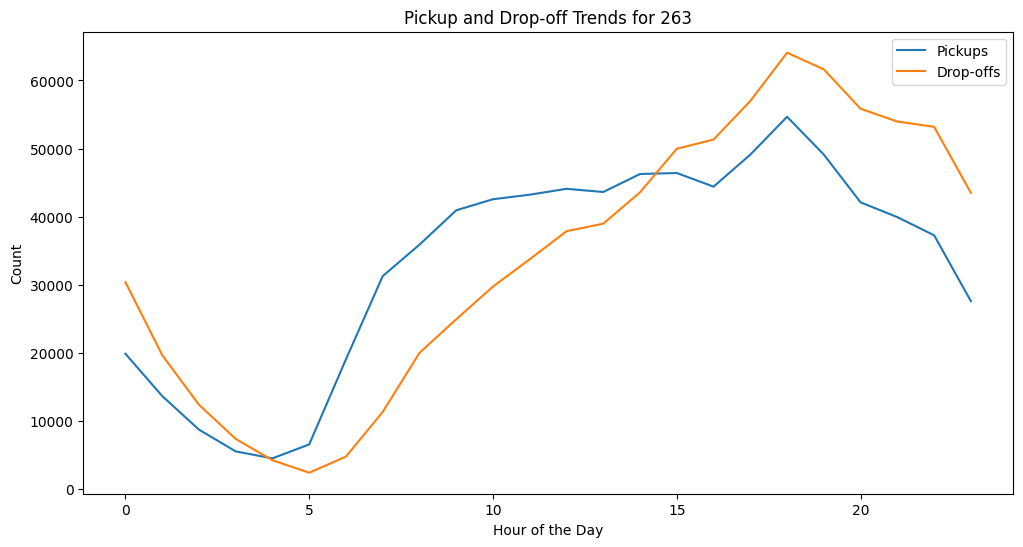

In [39]:
for location in pulocations_to_filter:
    plt.figure(figsize=(12, 6))
    plt.plot(pickup_hours, pickup_by_location.loc[location], label='Pickups')
    plt.plot(dropoff_hours, dropoff_by_location.loc[location], label='Drop-offs')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Count')
    plt.title(f'Pickup and Drop-off Trends for {location}')
    plt.savefig('Pickupanddropofftrends{location}.png')
    plt.legend()
    plt.show()

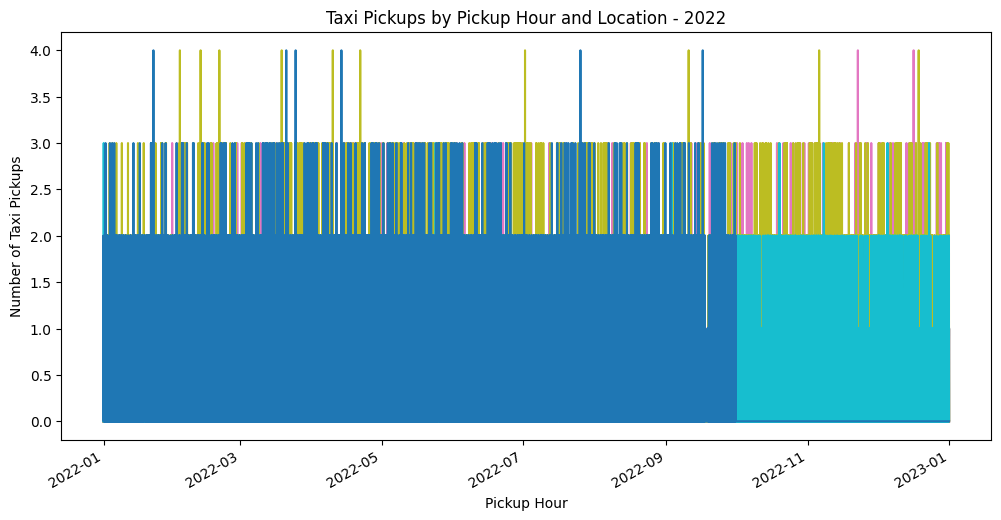

In [38]:
# Filter the DataFrame for a specific year
year = 2022
df = grouped_df[grouped_df['tpep_pickup_datetime'].dt.year == year]

# Filter the pivot_df for the specified PULocationID values
filtered_pivot_df = pivot_df[pivot_df.columns.intersection(pulocations_to_filter)]


# Visualize the hotspots on a graph for the specific year and filtered PULocationIDs
filtered_pivot_df.plot(figsize=(12, 6), legend=None)
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Taxi Pickups')
plt.title(f'Taxi Pickups by Pickup Hour and Location - {year}')
plt.show()